<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🚢 Titanic ⚓
    </h1>
</div>


# 📂 Overview

* **Background** <br>
  The Titanic dataset is one of the most iconic machine learning datasets, originating from the real-world tragedy of the RMS Titanic’s sinking in 1912. The dataset provides demographic and travel-related information for a set of passengers, allowing participants to apply data science techniques to predict survival outcomes.

This competition is a **classic binary classification task** and is often used as a benchmark or learning resource for beginners in data science and machine learning.

Note – The dataset is relatively small and clean, making it ideal for:

* Learning the full ML pipeline (EDA → preprocessing → modeling → evaluation → submission).
* Comparing different algorithms (tree-based models, SVM, logistic regression, etc.).
* Practicing feature engineering and dealing with missing values.

* **Goal of the Project** <br>
  Build a machine learning model to **predict whether a passenger survived or not** (`Survived` = 0/1) based on information like age, sex, class, fare, and others.

**Key Features**

| Feature                 | Type                    | Description                                        | 
| ----------------------- | ----------------------- | -------------------------------------------------- |
| **Pclass**              | Categorical (ordinal)   | Ticket class (1st, 2nd, 3rd)                       | 
| **Sex**                 | Categorical (binary)    | Gender (male/female)                               | 
| **Age**                 | Numerical (continuous)  | Age in years                                       | 
| **SibSp**               | Numerical (discrete)    | # of siblings/spouses aboard                       | 
| **Parch**               | Numerical (discrete)    | # of parents/children aboard                       | 
| **Fare**                | Numerical (continuous)  | Ticket fare                                        | 
| **Embarked**            | Categorical (nominal)   | Port of embarkation (C = Cherbourg, etc.)          | 
| **Cabin**               | Categorical (high null) | Cabin number (many missing values)                 | 
| **Ticket**              | Categorical (textual)   | Ticket number                                      | 
| **Name**                | Text                    | Passenger's full name                              |
| **Survived** *(target)* | Categorical (0/1)       | Target variable: 1 = Survived, 0 = Did not survive |

**Files Provided**

* `train.csv`: Training dataset with features and survival labels.
* `test.csv`: Test dataset (no survival labels).
* `gender_submission.csv`: Sample submission format with predictions.

(Source: [Titanic on Kaggle](https://www.kaggle.com/competitions/titanic))

**Project Objective**

The primary objective of this notebook is to perform **EDA and build a machine learning model to predict passenger survival**.

Key components of the pipeline include:

* **Exploratory Data Analysis (EDA):**

  * Understand distributions, relationships, and missing data.
  * Explore survival rate across sex, class, and age.

* **Feature Engineering:**

  * Handle missing values (especially `Age`, `Cabin`, `Embarked`).
  * Extract titles from names, combine `SibSp` + `Parch` into `FamilySize`, etc.

* **Modeling:**

  * Compare models: Logistic Regression, Random Forest, Gradient Boosting, etc.
  * Tune hyperparameters via cross-validation.

* **Evaluation Framework:**

  * Metric: Accuracy (used for Kaggle leaderboard).
  * Additional: ROC-AUC, F1-score, Confusion Matrix.
  * Use cross-validation to assess generalization performance.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [1]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import normaltest
import scikit_posthocs as sp

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [2]:
# Load the datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Verify shapes
print("Train Data Shape:", df_train.shape)
print("\nTest Data Shape:", df_test.shape)

Train Data Shape: (891, 12)

Test Data Shape: (418, 11)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [3]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Test Data Preview:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418

## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **training dataset** contains 891 samples with 9 columns, including the target variable `Survived`.
   - The **test dataset** includes 418 samples with 8 columns (without the target), ready for prediction.

**Feature Overview**  
   - Both datasets include all important attributes:  
     - **Numerical features:** `Age`, `Fare`, `SibSp`, `Parch`.
     - **Categorical features:** `Sex`, `Embarked`, `Pclass`, `Cabin`, `Ticket`, `Name`, `PassengerId`.

**Data Consistency and Completeness**  
   - The datasets have **missing values**, we need to handle this issue.
   - Data types are appropriate: numerical features are float64 and int64, and categorical features are objects (strings).
   - The column `PassengerId` is not meaningful for analysis. So this column is not really a part of the information we should care about. We can drop this column for both train and test data.
   - The `Cabin` and `Ticket` columns are mixed data types which are not meaningful for analysis and we need to remove the 2 columns.

In [5]:
# Drop columns PassengerId, Cabin and Ticket
df_train.drop("PassengerId", axis=1, inplace=True)
df_train.drop("Cabin", axis=1, inplace=True)
df_train.drop("Ticket", axis=1, inplace=True)
list_test_id = df_test["PassengerId"].copy().to_list()
df_test.drop("PassengerId", axis=1, inplace=True)
df_test.drop("Cabin", axis=1, inplace=True)
df_test.drop("Ticket", axis=1, inplace=True)

In [6]:
print("Train Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_train.drop(columns=["Survived", "Pclass"]).describe().T.style.background_gradient(cmap=cm))

print("\nTest Data describe:")
display(df_test.drop(columns=["Pclass"]).describe().T.style.background_gradient(cmap=cm))

Train Data describe:


,count,mean,std,min,25%,50%,75%,max
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200



Test Data describe:


,count,mean,std,min,25%,50%,75%,max
Age,332.000000,30.272590,14.181209,0.170000,21.000000,27.000000,39.000000,76.000000
SibSp,418.000000,0.447368,0.896760,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,418.000000,0.392344,0.981429,0.000000,0.000000,0.000000,0.000000,9.000000
Fare,417.000000,35.627188,55.907576,0.000000,7.895800,14.454200,31.500000,512.329200


## Descriptive Insights from Dataset Statistics

**Overview of Numerical Features**

| Feature   | Data Type        | Value Range | Initial Observation                       |
| --------- | ---------------- | ----------- | ----------------------------------------- |
| **Age**   | Continuous       | 0.17–80     | Slight right-skew, missing values (\~20%) |
| **SibSp** | Discrete integer | 0–8         | Highly right-skewed, mostly 0–1           |
| **Parch** | Discrete integer | 0–6         | Strong right-skew, mostly 0               |
| **Fare**  | Continuous       | 0–512.33    | Very right-skewed, extreme outliers       |

**Train vs Test Comparison**

`Age`

* **Mean**: Train ≈ **29.7**, Test ≈ **30.3** → Very close
* **Std**: \~14.5 → High variance
* **Median (50%)**: Train 28, Test 27
* **Conclusion**: Distribution is similar between sets. Missing values (\~20%) need imputation. Slight right skew.

`SibSp` (Siblings/Spouse Aboard)

* **Mean**: Train ≈ 0.52, Test ≈ 0.45
* **Std**: \~1.1 (Train), \~0.9 (Test) → Low variance
* **Median**: 0 → Majority of passengers travel alone
* **Max**: 8
* **Conclusion**: Discrete feature, very skewed toward 0 → encode as is or binarize (0 vs ≥1)

`Parch` (Parents/Children Aboard)

* **Mean**: Train ≈ 0.38, Test ≈ 0.39 → Consistent
* **Std**: \~0.8–0.98 → Slightly higher variance in test
* **Median**: 0 → Most passengers don’t travel with parents/children
* **Conclusion**: Strong right skew, most values = 0

`Fare`

* **Mean**: Train ≈ 32.20, Test ≈ 35.63
* **Std**: High: \~50–56 → High variance
* **Median**: 14.45 (both) → Large gap between mean and median
* **Max**: 512 → **Extreme outliers**
* **Conclusion**: Very **right-skewed** distribution → consider log-transform (`log1p(Fare)`) to reduce skew

**General Observations**

* **Train–test alignment** is strong across all features → no covariate shift concerns.
* `Age` has missing values in both sets → needs imputation.
* `Fare` has **heavy right-skew** and outliers → needs scaling or log-transform.
* `SibSp`, `Parch` are discrete and right-skewed → could be used as is or binarized.

In [7]:
cat_features = ["Name", "Sex", "Embarked", "Pclass"]
def convert_cat(df, cat_features = cat_features):
    for feature in cat_features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")
        else:
            pass
convert_cat(df_train)
convert_cat(df_test)

In [8]:
print("Train Data describe:")
df_train.drop(columns=["Survived", "Name"], axis=1).describe(include=["category", "object"]).T

Train Data describe:


,count,unique,top,freq
Pclass,891,3,3,491
Sex,891,2,male,577
Embarked,889,3,S,644


In [9]:
print("Test Data describe:")
df_test.drop(columns="Name", axis=1).describe(include=["category", "object"]).T

Test Data describe:


,count,unique,top,freq
Pclass,418,3,3,218
Sex,418,2,male,266
Embarked,418,3,S,270


In [10]:
df_test["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

## Insights on Categorical Features

1. `Pclass` (3 categories: 1, 2 and 3)

| Set   | Top Value | Freq | % Top |
| ----- | --------- | ---- | ----- |
| Train | No     | 491 | \~55% |
| Test  | No     | 218 | \~52% |

→ Although the percentages vary, they all have one thing in common: they are mostly type 3.

2. `Sex` (male/female)

| Set   | Top Value | Freq | % Top |
| ----- | --------- | ---- | ----- |
| Train | male     | 577 | \~64.7% |
| Test  | male     | 266 | \~63.6% |

→ Very close proportions — no distribution shift.

2. `Embarked` (S/C/Q)

| Set   | Top Value | Freq | % Top |
| ----- | --------- | ---- | ----- |
| Train | S     | 644 | \~72.4% |
| Test  | S     | 270 | \~64.5% |

→ S is consistently the dominant category across both train and test sets. Slight drop in proportion in test set (72.4% → 64.5%), but not significant. 

**Conclusion:**

The categorical features show strong distributional consistency between train and test sets.  <br>
→ The model can generalize well without any domain shift mitigation.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [11]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")

print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
+----------+---------------+-----------+
| Feature  | Missing_Count | Missing_% |
+----------+---------------+-----------+
| Age      | 177           | 19.87     |
| Embarked | 2             | 0.22      |
+----------+---------------+-----------+

⚠️  Total missing values: 179 out of 891 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
+---------+---------------+-----------+
| Feature | Missing_Count | Missing_% |
+---------+---------------+-----------+
| Age     | 86            | 20.57     |
| Fare    | 1             | 0.24      |
+---------+---------------+-----------+

⚠️  Total missing values: 87 out of 418 rows.


## Checking duplicate Value

In [12]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
✅ No duplicates found in 891 rows

🔍 Test Data Duplicate Analysis
✅ No duplicates found in 418 rows



## Checking Outlier Value

In [13]:
cat_features = ["Name", "Sex", "Embarked", "Pclass"]
num_features = ["Age", "SibSp", "Parch", "Fare"]
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


,Feature,Outlier Count,Outlier Detail
0,Age,11,"[66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80.0, 70.0, 70.0, 74.0]"
1,SibSp,46,"[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]"
2,Parch,213,"[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, ...]"
3,Fare,116,"[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, ...]"


In [14]:
checking_outlier(list_feature=num_features, df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier


,Feature,Outlier Count,Outlier Detail
0,Age,2,"[67.0, 76.0]"
1,SibSp,11,"[3, 4, 5, 3, 4, 8, 4, 8, 4, 3, 3]"
2,Parch,94,"[1, 1, 1, 1, 3, 1, 2, 2, 1, 2, 1, 2, 1, 2, 4, 1, 1, 2, 1, 1, 1, 4, 6, 2, 3, 1, 1, 2, 2, 2, 1, 1, 2, 5, 2, 3, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 9, 1, 1, 1, 2, 2, 2, 1, 9, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1]"
3,Fare,55,"[82.2667, 262.375, 76.2917, 263.0, 262.375, 262.375, 263.0, 211.5, 211.5, 221.7792, 78.85, 221.7792, 75.2417, 151.55, 262.375, 83.1583, 221.7792, 83.1583, 83.1583, 247.5208, 69.55, 134.5, 227.525, 73.5, 164.8667, 211.5, 71.2833, 75.25, 106.425, 134.5, 136.7792, 75.2417, 136.7792, 82.2667, 81.8583, 151.55, 93.5, 135.6333, 146.5208, 211.3375, 79.2, 69.55, 512.3292, 73.5, 69.55, 69.55, 134.5, 81.8583, 262.375, 93.5, 79.2, 164.8667, 211.5, 90.0, 108.9]"


## Data Quality Insights: Missing Values, Duplicates and Outliers

**1. Missing Values Analysis**

- We conducted a thorough check for missing values across the **training**, **test** datasets.  
- The **missing values** were detected in the datasets.

**Train Set:**

* Missing rates:

  * `Age`: **19.87%**
  * `Embarked`: **0.22%**

**Test Set:**

* Missing rates:

  * `Age`: **20.57%**
  * `Embarked`: **0.24%**

Missing patterns are highly consistent across train and test sets — primarily affecting social-related features (Age, Embarked).

While Embarked has negligible missing values (<1%), Age has a substantial missing rate (~20%), which must be imputed carefully during preprocessing.

**2. Duplicate Records Analysis**

- We examined the datasets for duplicate rows that could bias the model or inflate performance metrics.  
- **No duplicate records** were found in any dataset, confirming the uniqueness and integrity of each sample:  
  - Training Data: 0 duplicates out of 891 rows  
  - Test Data: 0 duplicates out of 418 rows 
- The absence of duplicates ensures that the model will not be trained or evaluated on repeated data points, which helps maintain the reliability of results.

**3. Outliers Records Analysis**

- We also examined the datasets for checking outliers.
- **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.
* Both **train** and **test** datasets contain **notable outliers** in `Age`, `SibSp`, `Parch` and `Fare`:

**4. Summary Table:**

| Aspect                 | Quick Note                                          |
| ---------------------- | --------------------------------------------------- |
| Missing Values         | Present, moderate level, preprocessing needed       |
| Outliers               | Found in `Age`, `SibSp`, `Parch` and `Fare`, further review advised |
| Duplicates             | None, clean datasets                                |
| Train/Test Consistency | Excellent: similar missing patterns and outliers    |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [15]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [16]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\n📈 Standardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

In [17]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

##  Survived Distribution

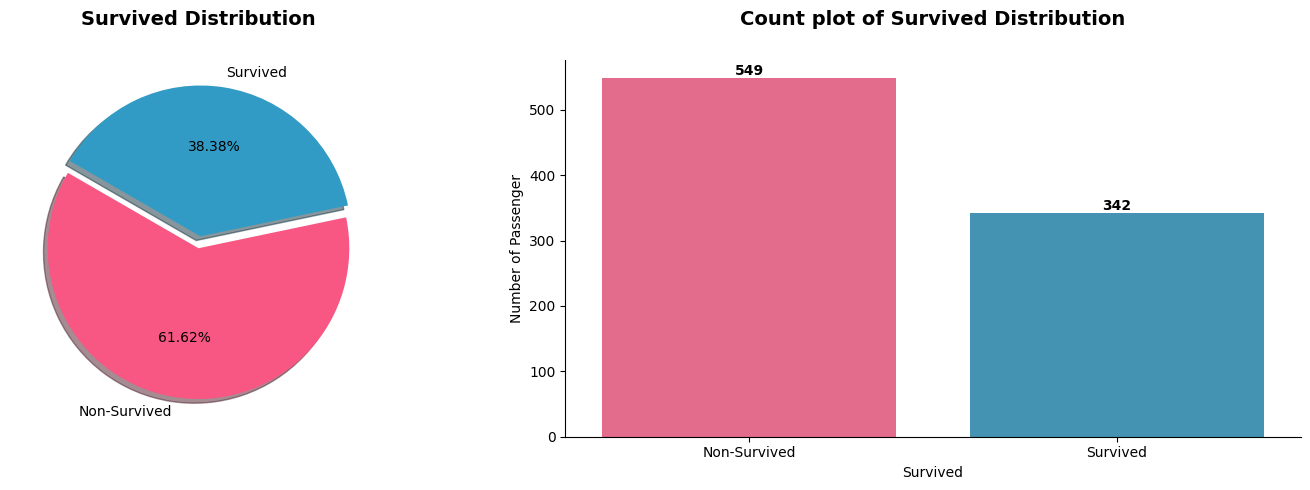

In [18]:
survived_Distribution  = df_train["Survived"].value_counts().loc[[0, 1]]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 5))
# ax[0]
ax[0].pie(
    survived_Distribution,
    labels = ["Non-Survived", "Survived"],
    colors = color(n_colors=2),
    autopct = "%1.2f%%",
    startangle = 150,
    explode = (0, 0.08),
    shadow= True
)
ax[0].set_title("Survived Distribution", weight="bold", fontsize=14, pad=25)
# ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)

# ax[1]
sns.countplot(data=df_train, x = "Survived", palette=color(n_colors=2), ax=ax[1])
ax[1].set_title("Count plot of Survived Distribution", weight="bold", fontsize=14, pad=25)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type="edge", fontsize=10, weight="bold")
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["Non-Survived", "Survived"])
ax[1].set_ylabel("Number of Passenger")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

plt.tight_layout()
plt.show()

**Observation:**

The survived distribution chart clearly indicates that the training dataset is **imbalanced**. Specifically, the **Non-survived** group accounts for **61.62%**, while the **Survived** group only makes up **38.38%** of the data.

This imbalance poses a risk of **model bias** toward the majority class during training. Without proper handling, the model may struggle to accurately predict the minority class (Survived), leading to **poor generalization and unfair performance**.

## Numerical Feature Distributions

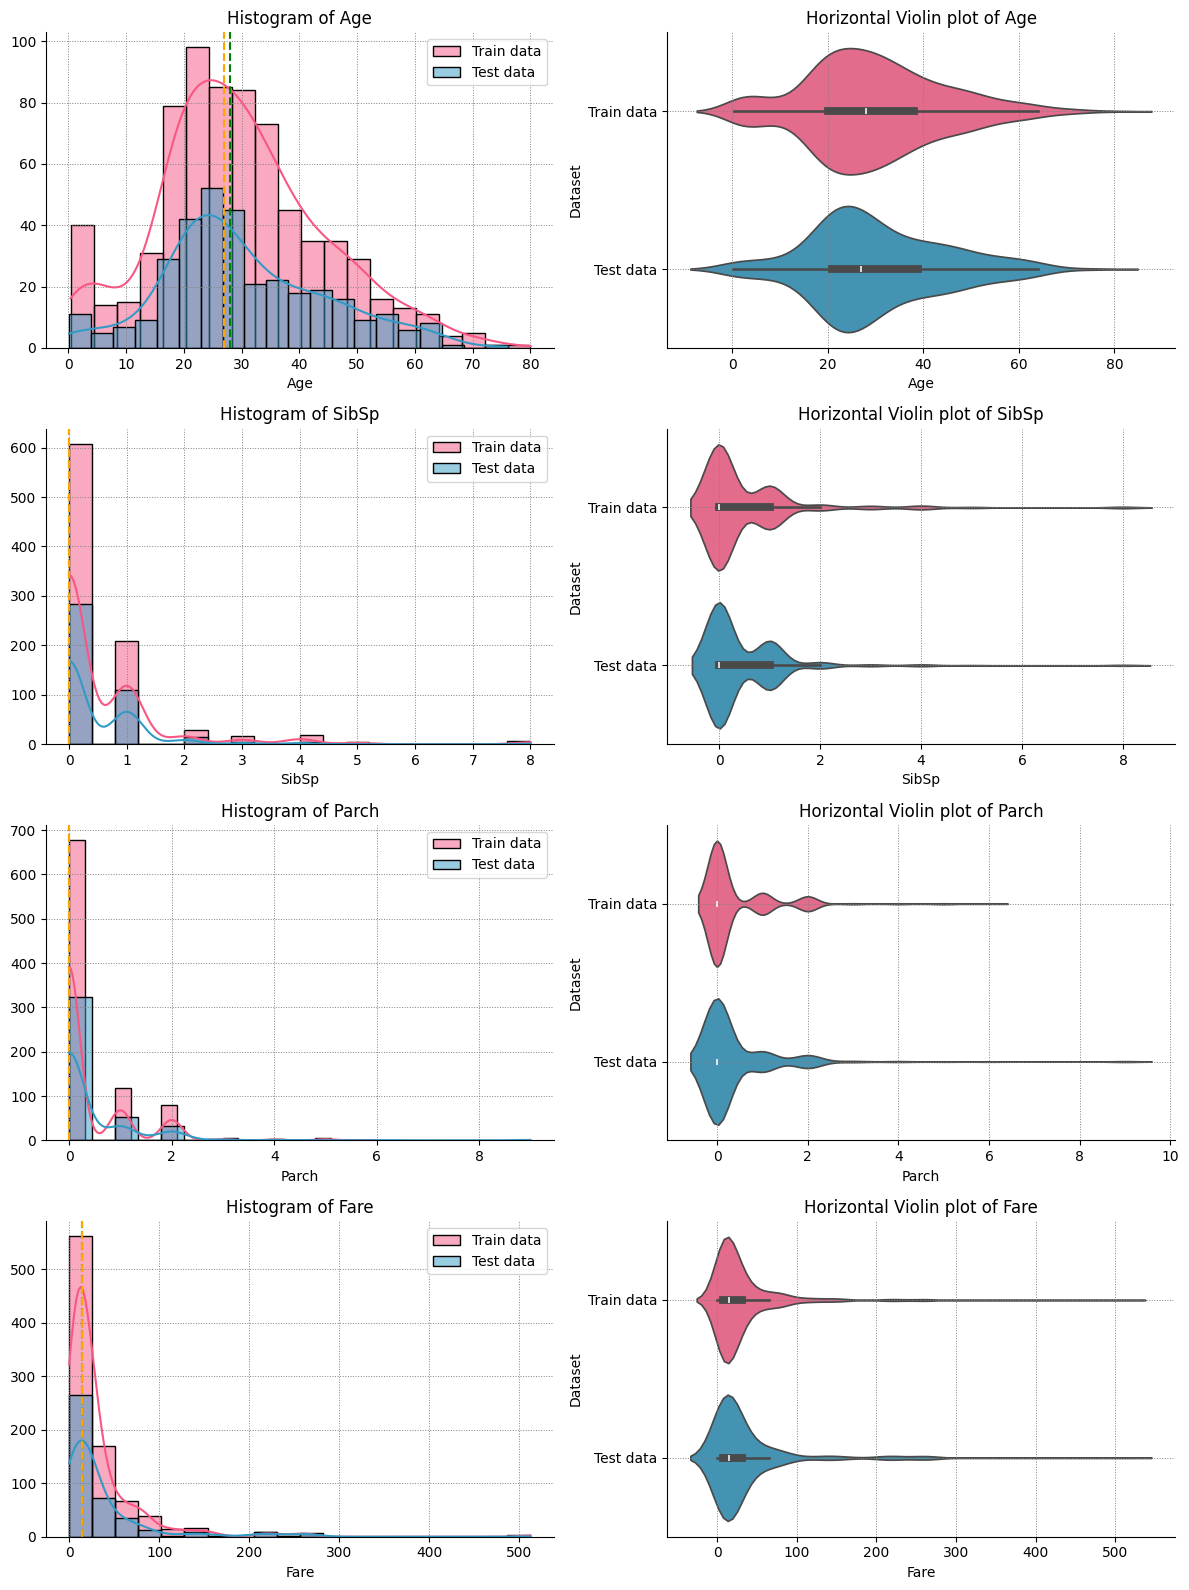

In [19]:
def plot_numerical_features(df_train, df_test, num_features):
    colors = color()
    n = len(num_features)

    fig, axes = plt.subplots(n, 2, figsize=(12, n * 4))
    axes = np.array(axes).reshape(n, 2)

    for i, feature in enumerate(num_features):
        sns.histplot(data=df_train[feature], color=colors[0], bins=20, kde=True, ax=axes[i, 0], label="Train data")
        sns.histplot(data=df_test[feature], color=colors[1], bins=20, kde=True, ax=axes[i, 0], label="Test data")
        axes[i, 0].set_title(f"Histogram of {feature}")
        axes[i, 0].legend()
        # axes[i, 0].set_facecolor("lightgray")
        axes[i, 0].set_ylabel("")
        axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
        axes[i, 0].axvline(df_train[feature].median(), color="green", linestyle="--", label="Median Train")
        axes[i, 0].axvline(df_test[feature].median(), color="orange", linestyle="--", label="Median Test")
        sns.despine(left=False, bottom=False, ax=axes[i, 0])

        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.violinplot(
            data=df_plot,
            x=feature,
            y="Dataset",
            palette=colors,
            orient="h",
            ax=axes[i, 1]
        )
        axes[i, 1].set_title(f"Horizontal Violin plot of {feature}")
        # axes[i, 1].set_facecolor("lightgray")
        axes[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)
        sns.despine(left=False, bottom=False, ax=axes[i, 1])

    plt.tight_layout()
    plt.show()

plot_numerical_features(df_train = df_train, df_test = df_test, num_features=num_features)

In [20]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<9} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+9.4f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature_train, skew_train_df = check_skewness(df_train, "Train data")
skew_feature_test, skew_test_df = check_skewness(df_test, "Test data")


🔍 Skewness for Train data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Fare                           |   +4.7873 | Highly skewed
SibSp                          |   +3.6954 | Highly skewed
Parch                          |   +2.7491 | Highly skewed
Age                            |   +0.3891 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Test data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Parch                          |   +4.6545 | Highly skewed
SibSp                          |   +4.1683 | Highly skewed
Fare                           |   +3.6872 | Highly skewed
Age                            |   +0.4574 | Approximately symm

**Insights on Numerical Feature Distributions**

**Remarks on Skewness (Distribution Asymmetry)**

| Feature   | Train Skewness | Test Skewness | Interpretation                                                                               |
| --------- | -------------- | ------------- | -------------------------------------------------------------------------------------------- |
| **Fare**  | +4.7873        | +3.6872       | **Highly right-skewed** → strong presence of high-value outliers. Consider log-transform. |
| **SibSp** | +3.6954        | +4.1683       | **Strong right-skew** → most values are 0–1, rare large values (e.g., 8).                 |
| **Parch** | +2.7491        | +4.6545       | **Highly skewed**, even more so in test set. Most passengers travel alone (Parch = 0).    |
| **Age**   | +0.3891        | +0.4574       | **Approximately symmetric**, no transformation needed.                                     |

**Insights from Visualizations**

**General Observation**:

   * All **feature distributions** are **highly consistent** between train and test sets.
   * No major **distribution shift**, indicating **good train–test split quality**.

**Age**:

   * Histogram shows a bell-like shape with slight right tail.
   * Violin plot confirms concentration around 20–40 years.
   * **Approximately symmetric** → no transformation needed.

**SibSp**:

   * Histogram spikes sharply at 0 and 1 → most passengers travel with few siblings/spouse.
   * Violin plot shows long tail reaching up to 8.
   * **Strongly skewed** → discrete, consider binning (e.g., `0`, `1`, `2+`) or leave as-is depending on model.

**Parch**:

   * Similar to `SibSp`: sharp spike at 0, low counts for other values.
   * More extreme skew in test set per violin plot and skewness score.
   * May benefit from binning or one-hot encoding in tree-based models.

**Fare**:

   * Extremely long right tail on both histogram and violin plot.
   * Outliers (e.g., > 200, 500) drive up skewness heavily.
   * Strong candidate for **`np.log1p(Fare)`** or `RobustScaler`.

**Overall Conclusion**

* **Distributions are well-aligned** between train and test → no domain adaptation needed.
* **Skewed features**: `Fare`, `SibSp`, `Parch` → should be **transformed or carefully encoded** to reduce bias and improve model performance.
* **Age** is clean and usable directly.

## Correlation Analysis of Numerical Features

In [21]:
def plot_correlation(train_data, test_data, train_name="Train Data", test_name="Test Data"):
    corr_train = train_data.corr(numeric_only=True)
    corr_test = test_data.corr(numeric_only=True)

    mask_train = np.triu(np.ones_like(corr_train, dtype=bool))
    adjusted_mask_train = mask_train[1:, :-1]
    adjusted_cereal_corr_train = corr_train.iloc[1:, :-1]

    mask_test = np.triu(np.ones_like(corr_test, dtype=bool))
    adjusted_mask_test = mask_test[1:, :-1]
    adjusted_cereal_corr_test = corr_test.iloc[1:, :-1]

    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

    fig, ax = plt.subplots(1, 2, figsize=(24, 10))

    sns.heatmap(data=adjusted_cereal_corr_train, mask=adjusted_mask_train,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[0])
    ax[0].set_title(f"Correlation Heatmap of {train_name}", fontsize=16, weight="bold")

    sns.heatmap(data=adjusted_cereal_corr_test, mask=adjusted_mask_test,
                annot=True, fmt=".1f", cmap=cmap,
                vmin=-1, vmax=1, linecolor="white", linewidths=0.5, ax=ax[1])
    ax[1].set_title(f"Correlation Heatmap of {test_name}", fontsize=16, weight="bold")

    plt.tight_layout()
    plt.show()

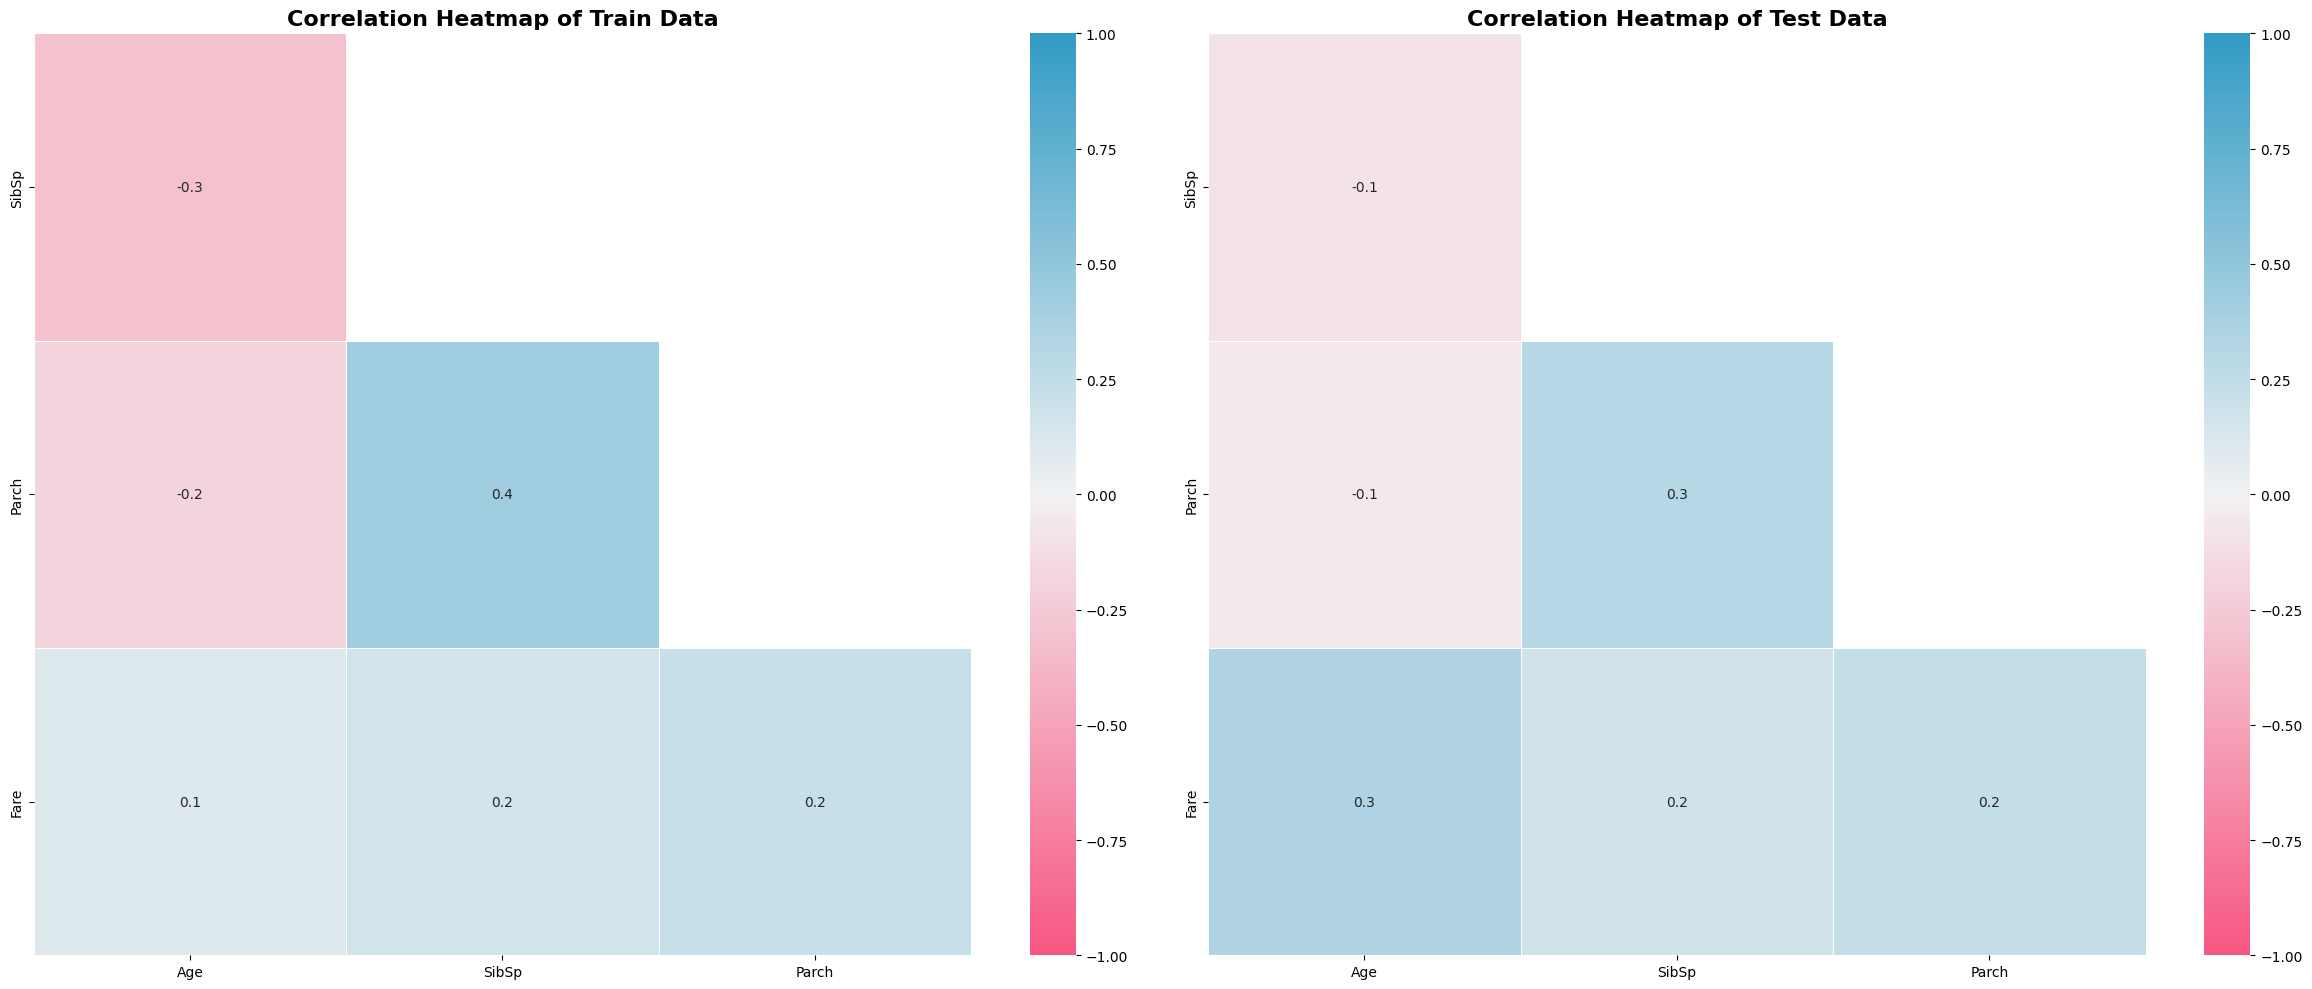

In [22]:
plot_correlation(train_data=df_train.drop(columns="Survived", axis=1), test_data=df_test)

**Observation on Correlation Heatmaps**

| Feature Pair      | Train Corr | Test Corr | Remark                                                                                          |
| ----------------- | ---------- | --------- | ----------------------------------------------------------------------------------------------- |
| `SibSp` & `Parch` | +0.40      | +0.30     | **Moderate correlation** — passengers with siblings often have parents/children onboard too. |
| `Fare` & `Parch`  | +0.20      | +0.20     | **Weak but consistent** — higher fare may be associated with family travel.                  |
| `Fare` & `SibSp`  | +0.20      | +0.20     | Weak positive — group travelers may pay more.                                                |
| `Fare` & `Age`    | +0.10      | +0.30     | Low to moderate — older passengers may purchase more expensive tickets.                      |
| `Age` & `Parch`   | -0.20      | -0.10     | Slight inverse — children more likely to travel with parents (Parch > 0).                    |
| `Age` & `SibSp`   | -0.30      | -0.10     | Similar reasoning — younger passengers (esp. children) often with siblings.                  |

**General Observations:**

* The **correlation structure between training and test sets is largely preserved**:

  * No significant shift in pairwise correlations → **no data drift**.
  * Useful for modeling: ensures learned interactions on train set generalize to test.

* Most correlations are **low to moderate**, indicating **low multicollinearity risk**.

  * Highest is `SibSp`–`Parch` (\~0.4) → expected due to family-related relationships.

**Implications for Modeling**

| Aspect                  | Interpretation                                                                           |
| ----------------------- | ---------------------------------------------------------------------------------------- |
| **Multicollinearity**   | Not a major concern, but still monitor for `SibSp`–`Parch`.                           |
| **Feature Engineering** | Consider combining `SibSp` + `Parch` into a new feature `FamilySize`.                 |

## Categorical Feature Distributions

In [23]:
def plot_categorical_distribution_both(cat_features, df_train, df_test, order=None):
    for feature in cat_features:
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 9))

        # COUNT PLOT – TRAIN
        sns.countplot(data=df_train, y=feature, ax=ax[0, 0],
                      palette=color(n_colors=len(df_train[feature].unique())), order=order)
        ax[0, 0].set_title(f"[Train] Count plot of {feature}", fontsize=13, pad=12)
        ax[0, 0].set_ylabel(feature)
        ax[0, 0].set_xlabel("")
        ax[0, 0].grid(axis="x", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 0], left=False, bottom=False)

        for p in ax[0, 0].patches:
            width = p.get_width()
            y = p.get_y() + p.get_height() / 2
            ax[0, 0].text(width + 0.01 * df_train[feature].value_counts().max(), y,
                        f"{int(width)}", ha="left", va="center", fontsize=9, fontweight="bold")
            
        # COUNT PLOT – TEST
        sns.countplot(data=df_test, y=feature, ax=ax[0, 1], 
                      palette=color(n_colors=len(df_test[feature].unique())), order=order)
        ax[0, 1].set_title(f"[Test] Count plot of {feature}", fontsize=13, pad=12)
        ax[0, 1].set_ylabel(feature)
        ax[0, 1].set_xlabel("")
        ax[0, 1].grid(axis="x", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 1], left=False, bottom=False)

        for p in ax[0, 1].patches:
            width = p.get_width()
            y = p.get_y() + p.get_height() / 2
            ax[0, 1].text(width + 0.01 * df_test[feature].value_counts().max(), y,
                        f"{int(width)}", ha="left", va="center", fontsize=9, fontweight="bold")
            
        # PIE CHART – TRAIN
        train_counts = df_train[feature].value_counts().sort_index()
        wedges, texts, autotexts = ax[1, 0].pie(
            train_counts,
            labels=train_counts.index,
            autopct="%1.1f%%",
            startangle=90,
            colors=color(n_colors=len(df_train[feature].unique())),
            wedgeprops=dict(width=0.4, edgecolor="w"),
            radius=1.1
        )
        for t in texts + autotexts:
            t.set_fontsize(9)
            t.set_fontweight("bold")
        ax[1, 0].set_title(f"[Train] Percentage Distribution of {feature}", pad=10)
        ax[1, 0].add_artist(plt.Circle((0, 0), 0.7, color="white"))
        ax[1, 0].axis("equal")

        # PIE CHART – TEST
        test_counts = df_test[feature].value_counts().sort_index()
        wedges, texts, autotexts = ax[1, 1].pie(
            test_counts,
            labels=test_counts.index,
            autopct="%1.1f%%",
            startangle=90,
            colors=color(n_colors=len(df_test[feature].unique())),
            wedgeprops=dict(width=0.4, edgecolor="w"),
            radius=1.1
        )
        for t in texts + autotexts:
            t.set_fontsize(9)
            t.set_fontweight("bold")
        ax[1, 1].set_title(f"[Test] Percentage Distribution of {feature}", pad=10)
        ax[1, 1].add_artist(plt.Circle((0, 0), 0.7, color="white"))
        ax[1, 1].axis("equal")

    plt.tight_layout()
    plt.show()

In [24]:
cat_features.remove("Name")
cat_features

['Sex', 'Embarked', 'Pclass']

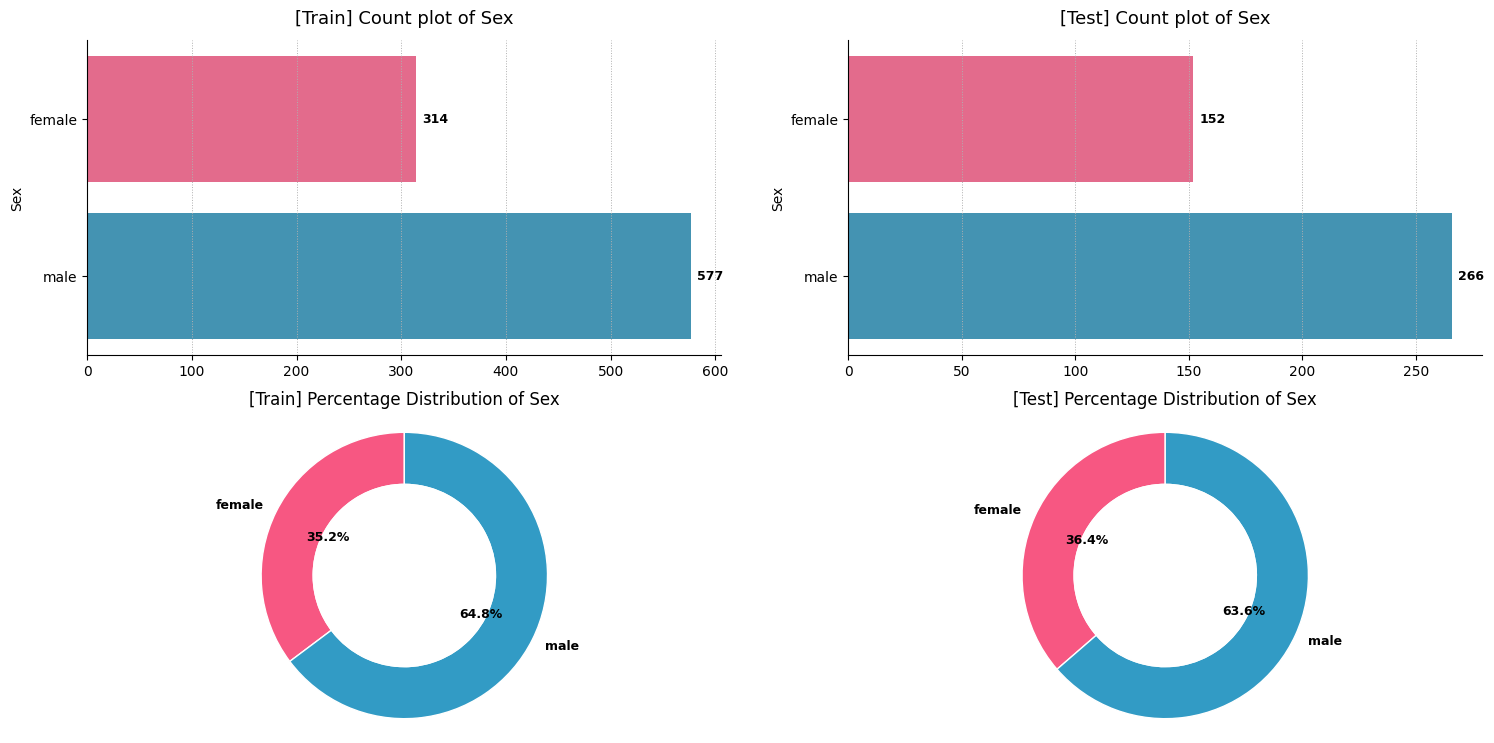

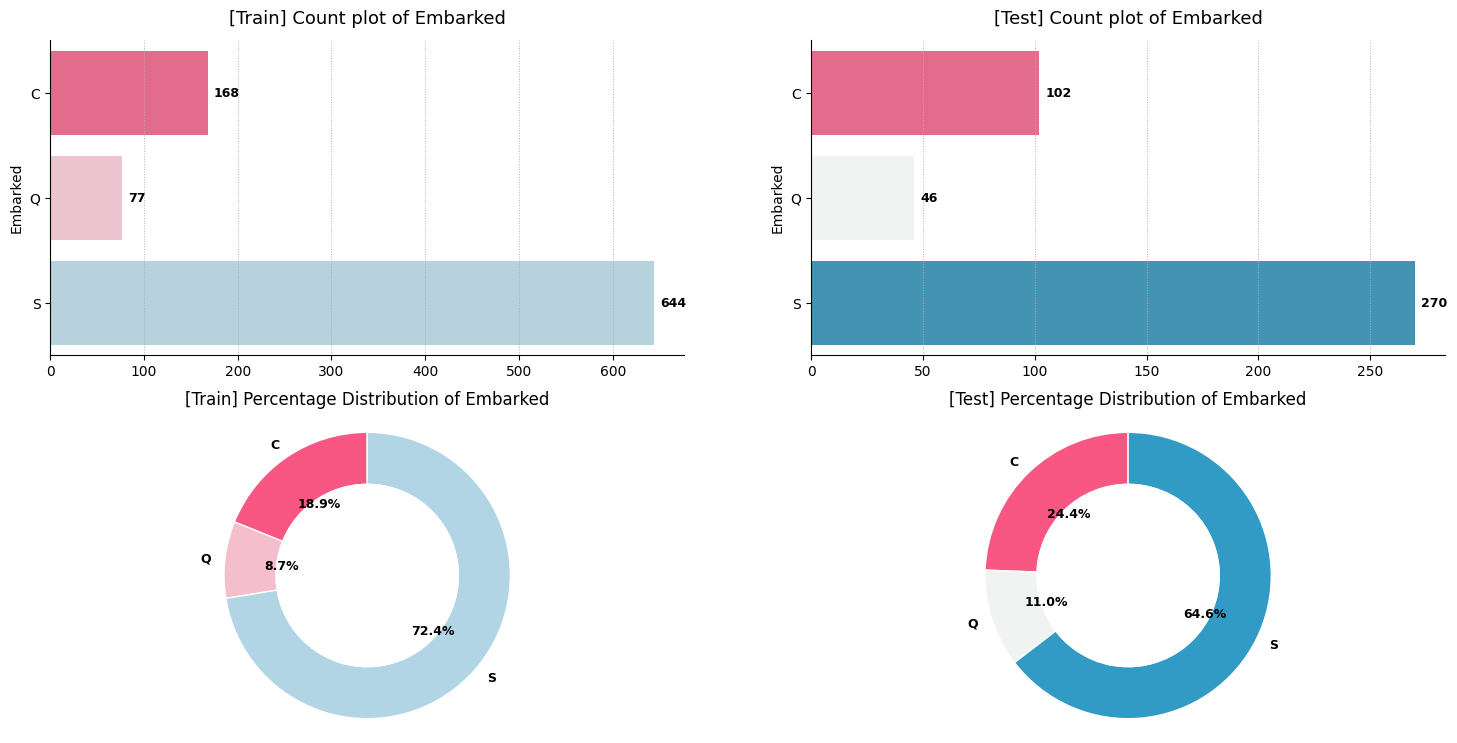

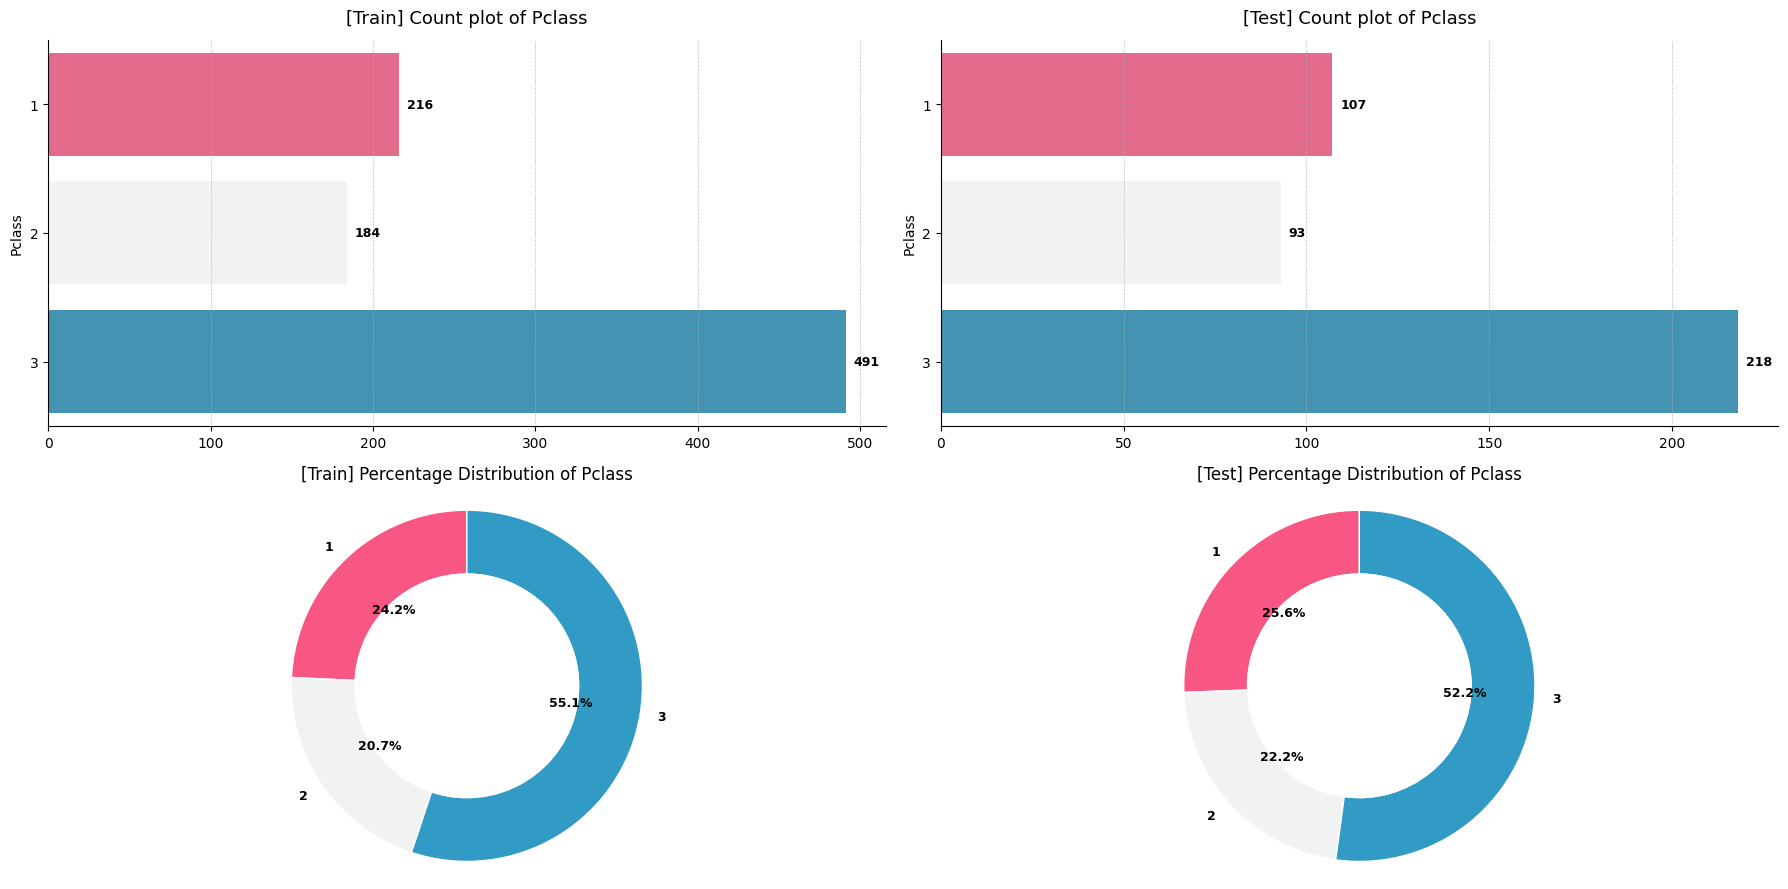

In [25]:
plot_categorical_distribution_both(cat_features=cat_features, df_train = df_train, df_test = df_test)

In [26]:
def top_ratio(df_test = df_test, df_train = df_train, cat_features = cat_features):
    dataset_names = ["Train", "Test"]
    datasets = [df_train, df_test]
    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        print(f"{name} Data")
        flagged = False
        for feature in cat_features:
            freq = data[feature].value_counts(normalize=True)
            top_ratio = freq.iloc[0]
            if top_ratio > 0.99:
                flagged = True
                print(f"⚠️  {feature}: {top_ratio:.1%} là '{freq.index[0]}'")
        if not flagged:
            print("✅ No feature has a category that makes up more than 99% of its values.")
        print("*" * 50)
top_ratio()

Train Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Test Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************


### Insights on Categorical Feature Distributions

**Consistency between training and testing:** <br>
- No feature distribution is greater than 99%.
- The distribution of values ​​of each feature is almost the same between train and test data, which is good for modeling and avoiding data drift.
- These are important features because they are able to help the model differentiate between different groups.

## Bivariate Analysis

,Survived,Count,Mean,Median,Std
0,0,424,30.626179,28.000000,14.172110
1,1,290,28.343690,28.000000,14.950952


🔎 D’Agostino and Pearson Normality Test for 'Age' across 'Survived' groups

 Group: 0 (n = 424)
  Statistic : 23.069
  p-value   : 0.00001
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 290)
  Statistic : 1.618
  p-value   : 0.44535
  🟢 Interpretation: Data appears to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Age' by 'Survived'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 65278.0
p-value     : 0.16049252477737763

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


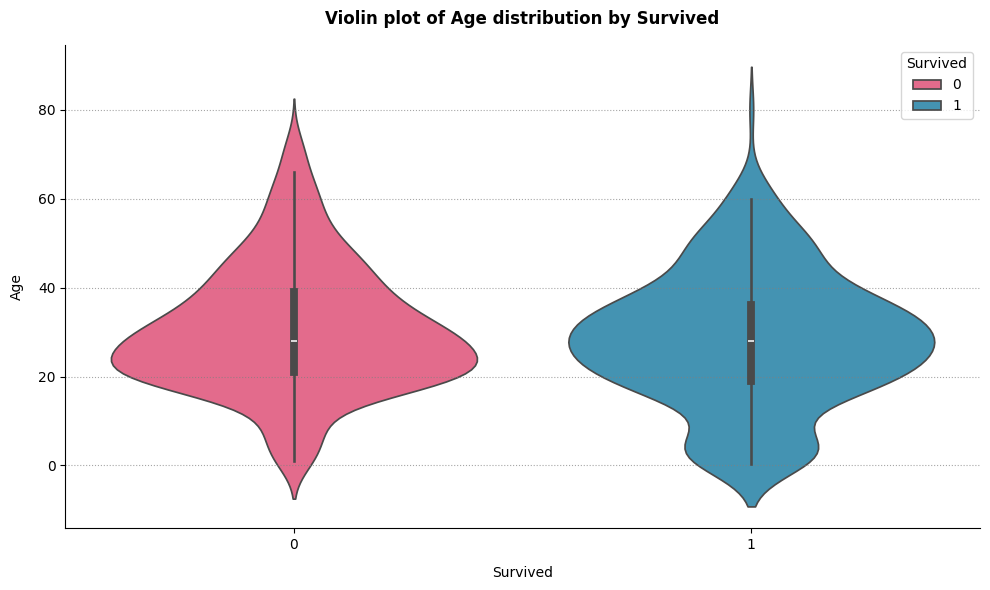

,Survived,Count,Mean,Median,Std
0,0,549,0.553734,0.000000,1.288399
1,1,342,0.473684,0.000000,0.708688


🔎 D’Agostino and Pearson Normality Test for 'SibSp' across 'Survived' groups

 Group: 0 (n = 549)
  Statistic : 430.216
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 342)
  Statistic : 152.606
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'SibSp' by 'Survived'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 85775.0
p-value     : 0.008016684059168793

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: The medians are equal, but distributions may still differ.


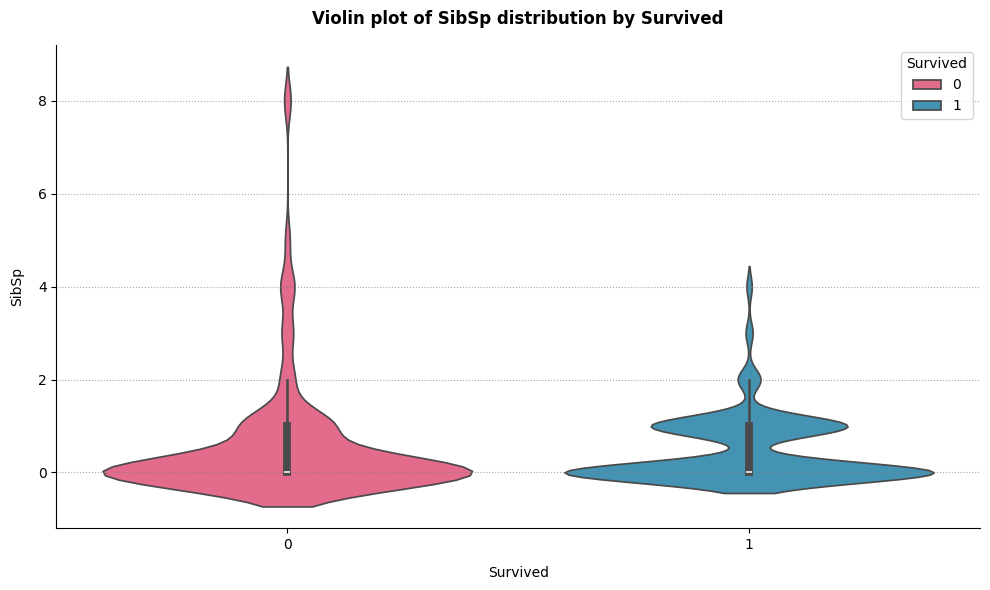

,Survived,Count,Mean,Median,Std
1,1,342,0.464912,0.000000,0.771712
0,0,549,0.329690,0.000000,0.823166


🔎 D’Agostino and Pearson Normality Test for 'Parch' across 'Survived' groups

 Group: 0 (n = 549)
  Statistic : 410.354
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 342)
  Statistic : 125.745
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Parch' by 'Survived'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 82385.0
p-value     : 3.712490908378456e-05

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: The medians are equal, but distributions may still differ.


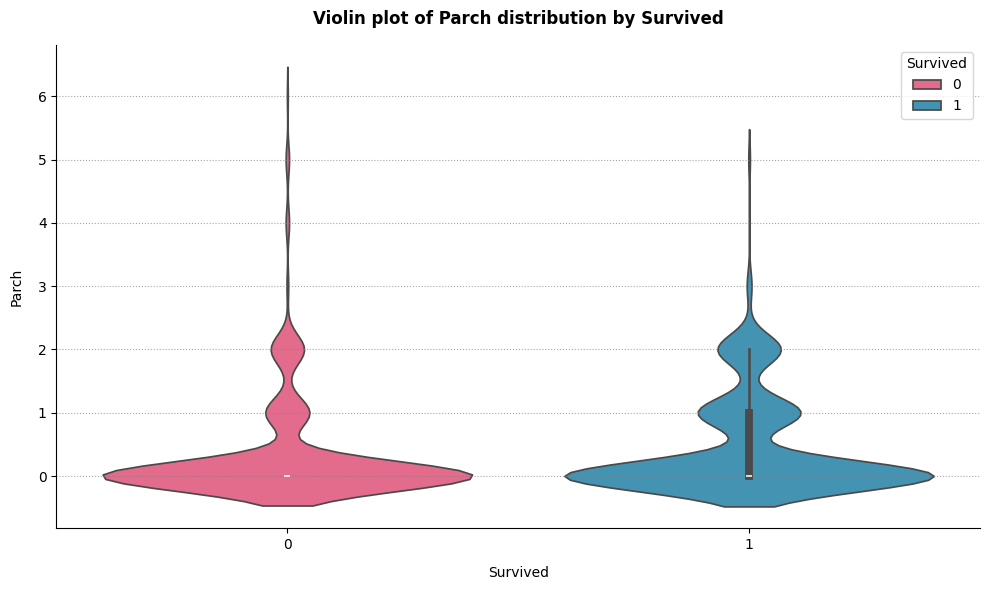

,Survived,Count,Mean,Median,Std
1,1,342,48.395408,26.000000,66.596998
0,0,549,22.117887,10.500000,31.388207


🔎 D’Agostino and Pearson Normality Test for 'Fare' across 'Survived' groups

 Group: 0 (n = 549)
  Statistic : 542.716
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 342)
  Statistic : 310.508
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'Fare' by 'Survived'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 57806.5
p-value     : 4.553477179250237e-22

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group '1' has a higher median 'Fare' than Group '0'.


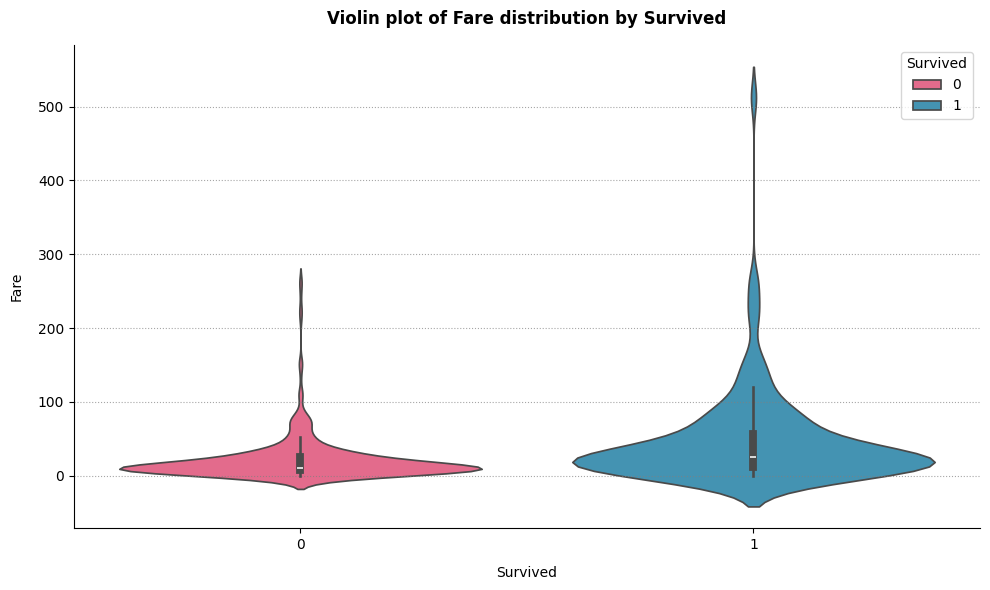

In [27]:
from IPython.core.display import HTML
def perform_statical_testing(feature, df_train = df_train, total_categories = 2, target_feature = "Survived"):
    cal_normaltest(cat_feature=target_feature, num_feature=feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=target_feature, num_feature=feature)
    else:
        pass

def plot_numerical_distribution_by_Survived(feature, df_train = df_train, target_feature = "Survived", order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violinplot and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the numerical variable.
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = target_feature, as_index= False)\
    .agg (
        Count = (feature, "count"),
        Mean = (feature, "mean"),
        Median = (feature, "median"),
        Std = (feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean", ascending=False)    

    summary_data = [
        ("Overall Mean", f"{df_train[feature].mean():.2f}"),
        ("Overall Median", f"{df_train[feature].median()}"),
        ("Overall Std", f"{df_train[feature].std():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cm).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(feature=feature, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 6))
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    colors = [cmap(0.0), cmap(1.0)]
    sns.violinplot(x=target_feature, y=feature, data=df_train, hue=target_feature, palette=colors, ax=ax)
    ax.set_title(f"Violin plot of {feature} distribution by {target_feature}", pad=15, weight = "bold")
    ax.set_xlabel(target_feature, labelpad=10)
    ax.set_ylabel(feature, labelpad=10)
    plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)
    plt.tight_layout()
    plt.show()

for feature in num_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {feature} by Survived</b></h2>"))
    plot_numerical_distribution_by_Survived(feature=feature)

**Insight Numerical Features by Survived**

`Age`

* **No statistically significant difference** in age distribution between those who survived and those who did not (p-value > 0.05).
* The **median age** is quite similar between the two groups, with a **broad and overlapping distribution** on both sides.

The result suggests that **age alone may not be a strong discriminator of survival**.

`Fare`

* There is a **statistically significant difference** in fare distribution (p-value ≈ 4.55e-22).
* The **Survived group** (1) has a **higher median fare** and a **longer right tail**, suggesting some survivors paid substantially more.

This aligns with historical knowledge: passengers in **higher classes (1st class)**—who paid more—had better access to lifeboats and were more likely to survive.

`SibSp` (Number of siblings/spouses aboard)

* Statistically significant difference between groups (p-value ≈ 0.008).
* The **Non-Survived group** (0) is heavily skewed towards having **no siblings/spouses**, while the **Survived group** shows a **broader distribution**.

This suggests that **having family on board might have slightly improved survival chances**, possibly due to stronger support or shared decision-making during evacuation.

`Parch` (Number of parents/children aboard)

* Statistically significant difference (p-value ≈ 3.71e-05).
* Survivors (1) tend to have **a slightly wider spread and higher median** in `Parch`.

Similar to `SibSp`, **traveling with family may have provided a survival advantage**.

**Summary**

| Feature | Statistically Significant? | Key Insight                                                    |
| ------- | -------------------------- | -------------------------------------------------------------- |
| `Age`   | No                       | Age doesn't clearly differentiate survivors from non-survivors |
| `Fare`  | Yes                      | Higher fare (likely 1st class) increases survival              |
| `SibSp` | Yes                      | Having siblings/spouses aboard may help survival               |
| `Parch` | Yes                      | Traveling with parents/children positively impacts survival    |

In [28]:
# defining function for plotting
def bivariate_percent_plot(cat, df, figsize=(15, 6), order = None, rot = 0):
    
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {cat} by Survived</b></h2>"))
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=figsize)
    # Plot 1
    # Calculate the total number of each "cat" by Survived
    grouped = df.groupby([cat, "Survived"]).size().unstack(fill_value=0)
    # Calculate the percentages
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    if order is not None:
        percentages = percentages.loc[order]
        labels = order
    else:
        labels = percentages.index

    # That method uses HUSL colors, so you need hue, saturation, and lightness. 
    # I used hsluv.org to select the colors of this chart.
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # Draw stacked bar plot
    ax[0] = percentages.plot(kind="bar", stacked=True, cmap=cmap, ax = ax[0], use_index=True)
    for container in ax[0].containers:
        ax[0].bar_label(container, fmt='%1.2f%%', label_type="center", weight="bold", fontsize=10)

    ax[0].set_title(f"Percentage of Survived by {cat}", fontsize=14, weight="bold")
    ax[0].set_xlabel(f"{cat}", fontsize=12)
    ax[0].set_ylabel("% Survived Rate", fontsize=12)
    ax[0].set_xticklabels(labels = labels, rotation = 0)
    ax[0].legend_.remove()
    # ax[0].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[0])

    # Plot 2
    sns.countplot(data=df, hue = "Survived", x = cat,
                palette=color(n_colors=2), ax=ax[1], order=order)
    # Show value for each bar.
    for container in ax[1].containers:
        ax[1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

    ax[1].set_title(f"Survived by {cat}", fontsize=14, weight="bold")
    ax[1].set_xlabel(f"{cat}", fontsize=12)
    ax[1].set_ylabel("Number of Customer", fontsize=12)
    ax[1].legend(title="Survived", bbox_to_anchor=(1.05, 1), loc="upper left")
    # ax[1].grid(color="gray", linestyle=":", linewidth=0.7)
    sns.despine(left=False, bottom=False, ax=ax[1])
    plt.tight_layout()
    plt.show()

    cal_ChiSquare(cat_feature=cat, target_feature="Survived", df=df, show_residuals=True)

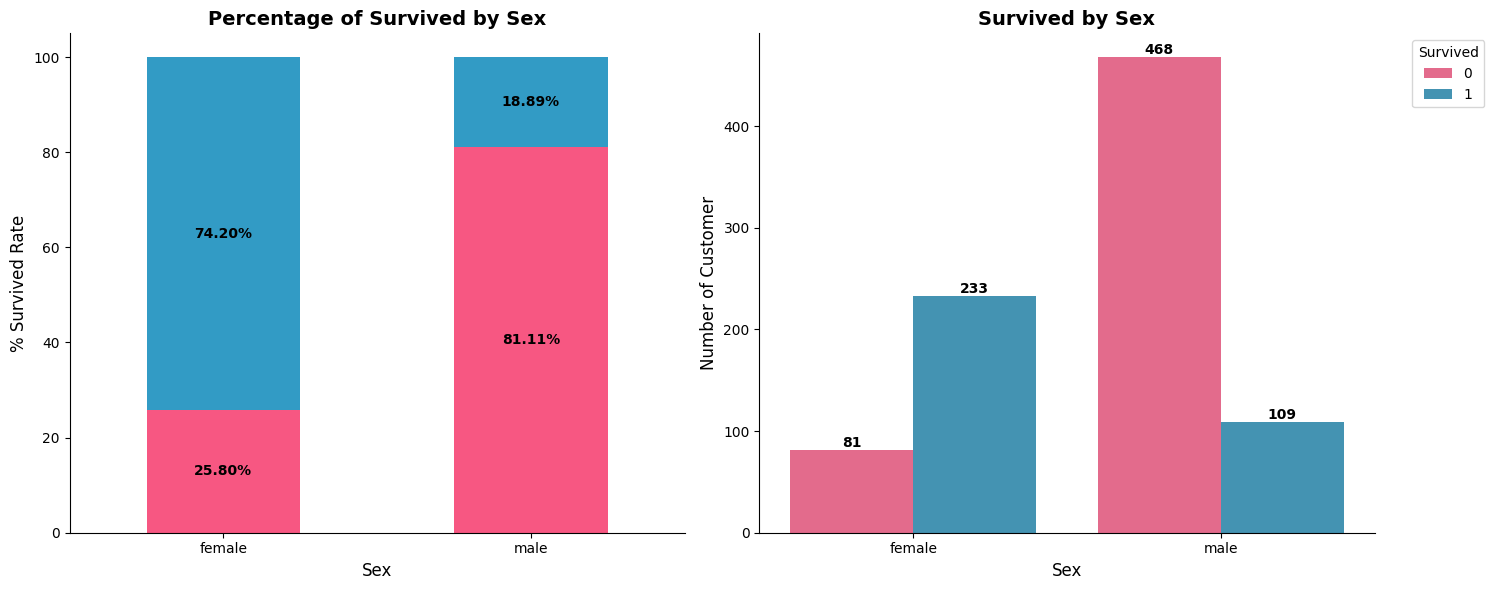


🔍 Chi-Square Test of Independence: 'Sex' vs. 'Survived'
Chi-squared statistic: 260.717
Degrees of freedom: 1
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Sex' and 'Survived'.

📈 Standardized Residuals:
Survived     0      1
Sex                  
female   -8.09  10.25
male      5.97  -7.56


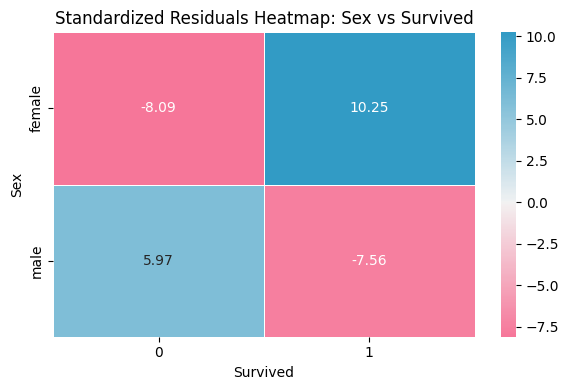

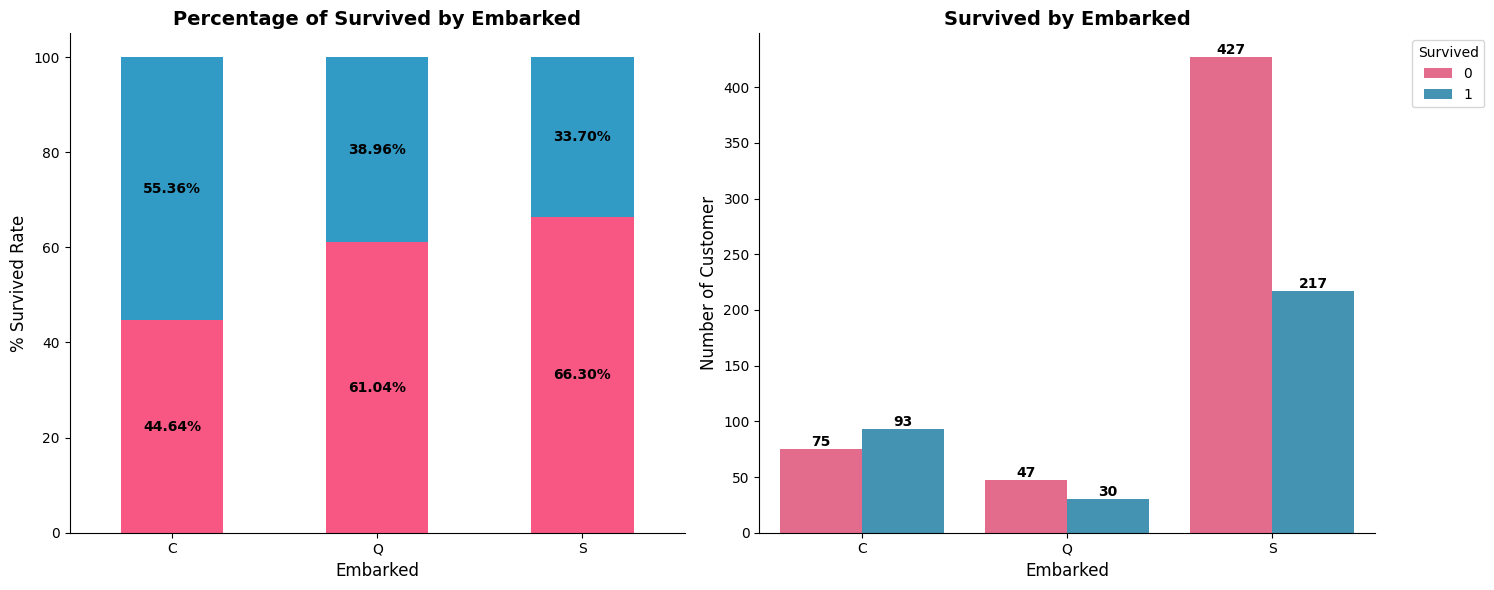


🔍 Chi-Square Test of Independence: 'Embarked' vs. 'Survived'
Chi-squared statistic: 26.489
Degrees of freedom: 2
p-value: 0.000002
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Embarked' and 'Survived'.

📈 Standardized Residuals:
Survived     0     1
Embarked            
C        -2.82  3.59
Q        -0.08  0.10
S         1.47 -1.87


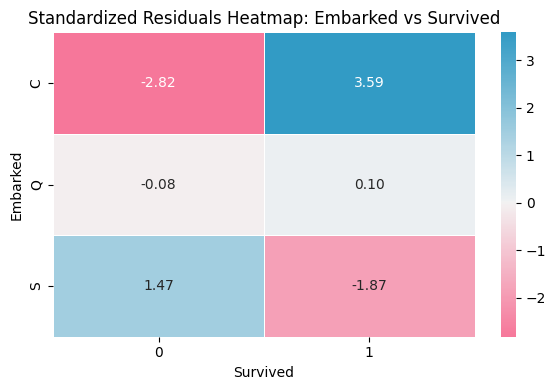

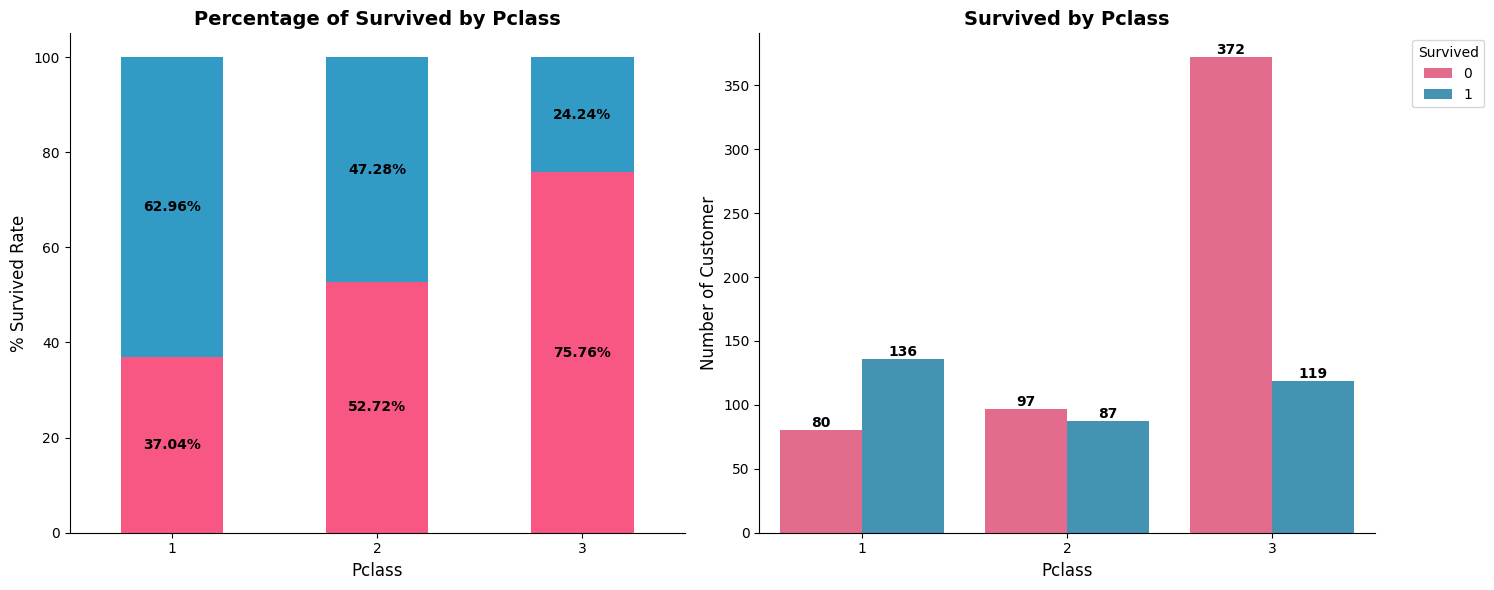


🔍 Chi-Square Test of Independence: 'Pclass' vs. 'Survived'
Chi-squared statistic: 102.889
Degrees of freedom: 2
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Pclass' and 'Survived'.

📈 Standardized Residuals:
Survived     0     1
Pclass              
1        -4.60  5.83
2        -1.54  1.95
3         3.99 -5.06


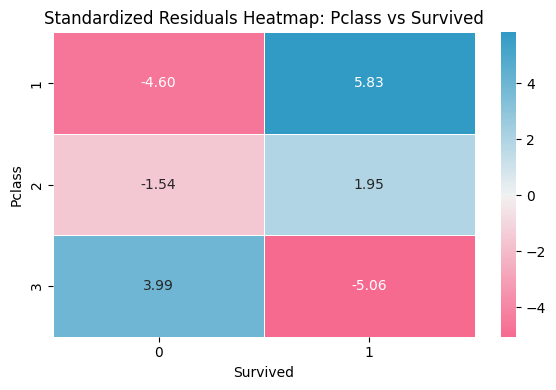

In [29]:
for feature in cat_features:
    bivariate_percent_plot(cat=feature, df= df_train)

### Insight for Categorical Features by Personality

`Gender`

The test results reveal a **significant relationship between gender and survival likelihood**. Specifically:

- **Females had a markedly higher survival rate than males** — this difference isn't due to chance, as shown by a very high Chi-Square value and a near-zero p-value.
- The standardized residuals reflect this pattern: women survived at a higher-than-expected rate, while men survived less than expected.

**Summary**:  
This supports the notion that, in emergency situations, gender may strongly influence survival outcomes. The insight is valuable for social research, historical studies, or behavioral analysis.

`Embarked` 

The results indicate a **statistically significant relationship** between the embarkation point and survival rate:

- With a very small p-value (≈ 0.000002), we **reject the null hypothesis**, meaning the port of embarkation likely influenced the chance of survival.
- Passengers who **embarked at port C (Cherbourg)** had a **higher-than-expected survival rate** (standardized residual: +3.59).
- Conversely, passengers who **embarked at port S (Southampton)** had a **lower-than-expected survival rate** (residual: -1.87).
- Port Q (Queenstown) showed **no clear deviation** from expectations.

**Summary**:  
The location where passengers boarded might be connected to their cabin positions or deck level, which could affect their escape chances during the disaster. This analysis provides insights for historical behavioral studies and ship design assessments.

`Pclass`

All tests produced very low p-values ⇒ **reject the null hypothesis**, indicating that **variables such as Gender, Embarkation Point, and Ticket Class have a significant impact on survival rates**.

Key findings from standardized residuals:

- **Gender**:  
  - Females survived **more than expected**.  
  - Males died **more than expected**.

- **Embarkation Point**:  
  - Passengers from **Cherbourg (C)** survived **more than expected**.  
  - Passengers from **Southampton (S)** survived **less than expected**.  
  - **Queenstown (Q)** showed no clear deviation.

- **Ticket Class (Pclass)**:  
  - **1st Class** passengers survived **more than expected**.  
  - **3rd Class** passengers died **more than expected**.  
  - **2nd Class** showed moderate deviation.

**Summary**:  
Survival chances on the Titanic weren’t evenly distributed—they were **strongly influenced by gender, embarkation point, and ticket class**. These factors likely reflected cabin location and social privileges in moments of crisis.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Feature Engineering

### Family

In [30]:
# Merge 2 columns SibSp and Parch.
df_train["Family_Size"] = df_train["SibSp"].astype("int8") + df_train["Parch"].astype("int8") + 1

# (0, 1], (1, 4], (4, 6], (6, 20]
df_train["Family_Cat"] = pd.cut(df_train["Family_Size"], bins = [0, 1, 4, 6, 20], labels= ["Solo", "Small", "Medium", "Large"])

In [31]:
# Merge 2 columns SibSp and Parch.
df_test["Family_Size"] = df_test["SibSp"].astype("int8") + df_test["Parch"].astype("int8") + 1

# (0, 1], (1, 4], (4, 6], (6, 20]
df_test["Family_Cat"] = pd.cut(df_test["Family_Size"], bins = [0, 1, 4, 6, 20], labels= ["Solo", "Small", "Medium", "Large"])

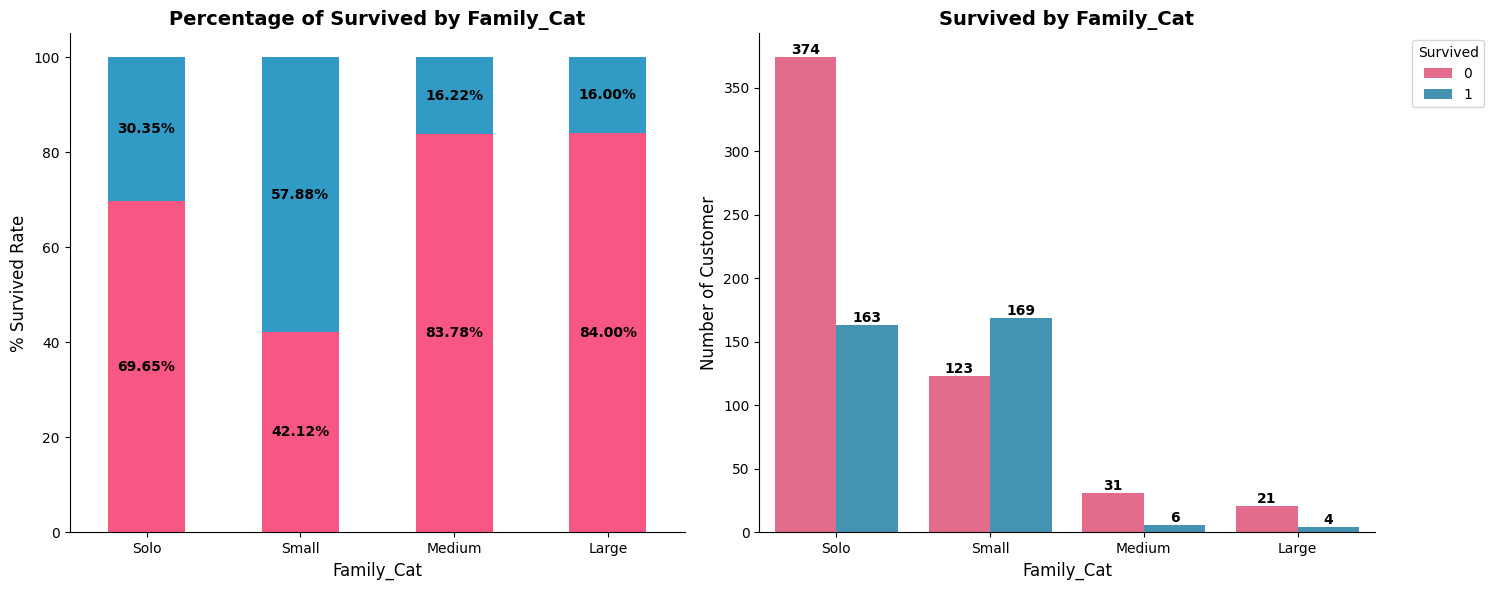


🔍 Chi-Square Test of Independence: 'Family_Cat' vs. 'Survived'
Chi-squared statistic: 74.538
Degrees of freedom: 3
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Family_Cat' and 'Survived'.

📈 Standardized Residuals:
Survived       0     1
Family_Cat            
Solo        2.37 -3.00
Small      -4.24  5.38
Medium      1.72 -2.18
Large       1.43 -1.81


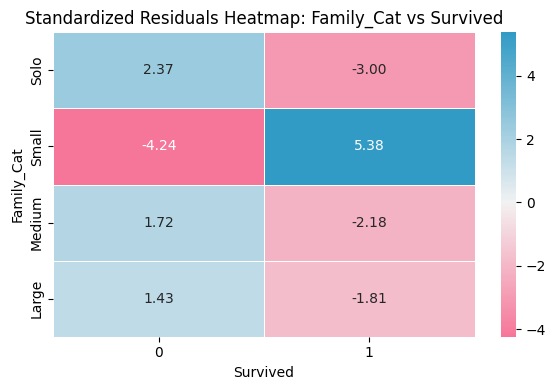

In [32]:
bivariate_percent_plot(cat="Family_Cat", df=df_train)

**Conclusion**:  
Passengers who traveled alone (Solo) and those with large families had **higher-than-expected death rates**, while **small families had notably higher survival rates**. This suggests that family group size may significantly influence survival chances in a disaster scenario.

### Title

In [33]:
import re

def extract_title(name):
    p = re.compile(r",\s*([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

df_train["Title"] = df_train["Name"].apply(lambda name: extract_title(name))

In [34]:
df_train["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [35]:
df_test["Title"] = df_test["Name"].apply(lambda name: extract_title(name))
df_test["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [36]:
def group_title(title):
    if title in ["Mr", "Mrs", "Miss", "Master"]:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"

df_train["Title"] = df_train["Title"].apply(lambda title: group_title(title))
df_test["Title"] = df_test["Title"].apply(lambda title: group_title(title))

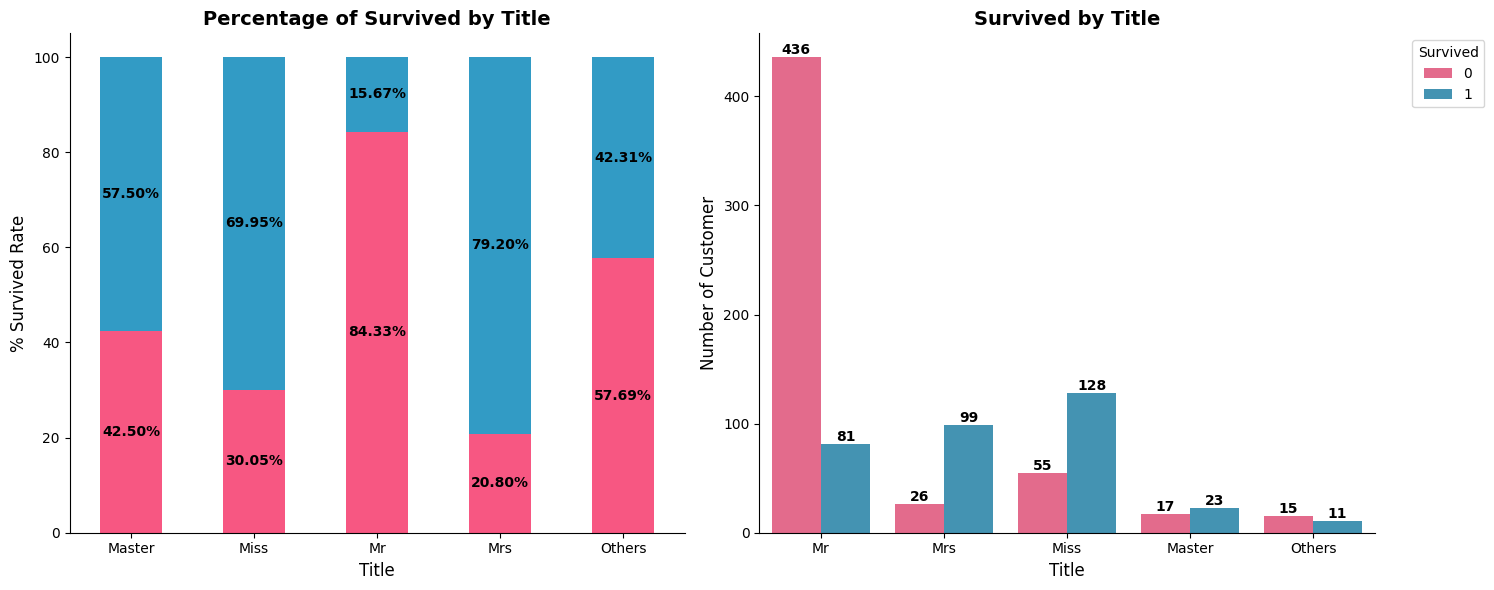


🔍 Chi-Square Test of Independence: 'Title' vs. 'Survived'
Chi-squared statistic: 284.283
Degrees of freedom: 4
p-value: 0.000000
✅ Result: p-value < 0.05 → Reject H₀
→ There is a **statistically significant association** between 'Title' and 'Survived'.

📈 Standardized Residuals:
Survived     0     1
Title               
Master   -1.54  1.95
Miss     -5.44  6.89
Mr        6.58 -8.34
Mrs      -5.81  7.37
Others   -0.25  0.32


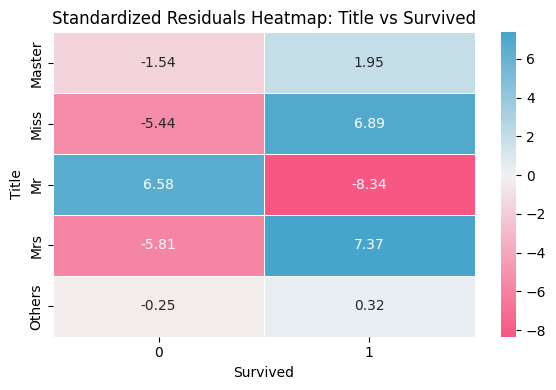

In [37]:
bivariate_percent_plot(cat="Title", df=df_train)

**General Interpretation**:  
- **Female passengers (Miss, Mrs)** and **children (Master)** survived **more than expected**.  
- **Male passengers (Mr)** experienced **higher-than-expected mortality**.  
- Titles categorized as “Others” showed no notable deviation.

## Handling Missing Value

In [38]:
age_by_sex_pclass = df_train.groupby(["Sex", "Pclass"], observed=True).median(numeric_only = True)["Age"]
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [39]:
# Filling the missing value in Age with the medians of Sex and Pclass groups.
df_train["Age"] = df_train.groupby(["Sex", "Pclass"], observed=True)["Age"].transform(lambda x: x.fillna(x.median(numeric_only=True)))

In [40]:
df_test["Age"] = df_test.groupby(["Sex", "Pclass"], observed=True)["Age"].transform(lambda x: x.fillna(x.median(numeric_only=True)))

In [41]:
mode_value_train = df_train["Embarked"].mode()[0]
df_train["Embarked"].fillna(mode_value_train, inplace=True)
mode_value_test = df_test["Embarked"].mode()[0]
df_test["Embarked"].fillna(mode_value_test, inplace=True)

In [42]:
median_value_test = df_test["Fare"].median()
df_test["Fare"].fillna(median_value_test, inplace=True)

In [43]:
print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
✅ No missing values detected in 891 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
✅ No missing values detected in 418 rows.


## Handling Skewness

In [44]:
df_train.drop(columns=["Family_Size", "Name", "SibSp", "Parch"], axis=1, inplace=True)
df_test.drop(columns=["Family_Size", "Name", "SibSp", "Parch"], axis=1, inplace=True)

In [45]:
num_features = ["Age", "Fare"]

In [46]:
skew_feature_train, skew_train_df = check_skewness(data=df_train, dataset_name="Train Data",numerical_features=num_features)


🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Fare                           |   +4.7873 | Highly skewed
Age                            |   +0.5341 | Moderately skewed
----------------------------------------------------------------------


In [47]:
skew_feature_test, skew_test_df = check_skewness(data=df_train, dataset_name="Test Data",numerical_features=num_features)


🔍 Skewness for Test Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
Fare                           |   +4.7873 | Highly skewed
Age                            |   +0.5341 | Moderately skewed
----------------------------------------------------------------------


In [48]:
print(df_train["Fare"].dropna().shape)

(891,)


In [49]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]


    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    print(skew_vals)

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed

In [50]:
processed_train_df, transformed_columns, sparse_columns, skewed_columns = handle_skewed_features(df=df_train, num_features=skew_feature_train)

skew_feature_train, skew_train_df = check_skewness(data=processed_train_df, numerical_features=["PT_Fare","PT_Age"],
                                                   dataset_name= "Train data")

Fare    4.779253
Age     0.533184
dtype: float64

🔍 Skewness for Train data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
PT_Age                         |   +0.0541 | Approximately symmetric
PT_Fare                        |   -0.0403 | Approximately symmetric
----------------------------------------------------------------------


In [51]:
processed_test_df, transformed_columns_test, sparse_columns_test, skewed_columns_test = handle_skewed_features(df=df_test, num_features=skew_feature_test)

skew_feature_test, skew_test_df = check_skewness(data=processed_test_df, numerical_features=["PT_Fare","PT_Age"],
                                                   dataset_name= "Test Data")

Fare    3.679036
Age     0.677490
dtype: float64

🔍 Skewness for Test Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
PT_Age                         |   +0.1017 | Approximately symmetric
PT_Fare                        |   -0.0806 | Approximately symmetric
----------------------------------------------------------------------


**Observations from the Skewness Table (`processed_train_df` and `processed_test_df`):**

🔴 **Skewed**:

* Ony feature `Age` and `Fare` exhibit skewness.

✅ **Approximately Symmetric**:

* Several features, such as:

  * `PT_Age` and `PT_Fare` close to zero.
  * This indicates that **Yeo-Johnson transformation was effective** for this feature.

## Create Test Set

Suppose we chatted with experts who told us that the **Fare** is a very important attribute to predict **Survived**. We may want to ensure that the test set is representative of the various categories of **Fare** in the whole dataset. Since the **Fare** is a continuous numerical attribute, we first need to create an fare category attribute.

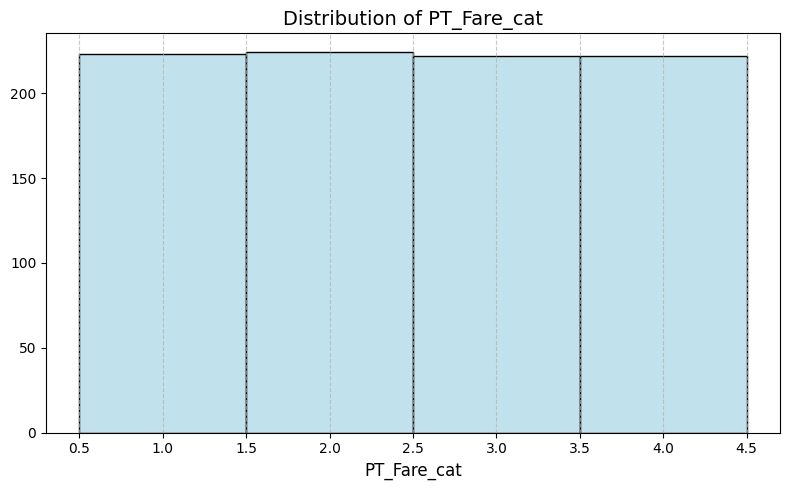

In [52]:
processed_train_df["PT_Fare_cat"] = pd.qcut(processed_train_df["PT_Fare"],
                                              q=4,
                                              labels=[1, 2, 3, 4])

plt.figure(figsize=(8, 5))
sns.histplot(data=processed_train_df, x="PT_Fare_cat", color="lightblue", edgecolor="black")

plt.title("Distribution of PT_Fare_cat", fontsize=14)
plt.xlabel("PT_Fare_cat", fontsize=12)
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [53]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_train_df, processed_train_df["PT_Fare_cat"]):
    start_train_set = processed_train_df.loc[train_index]
    start_test_set = processed_train_df.loc[test_index]

In [54]:
# Now we should remove the PT_Fare_cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("PT_Fare_cat", axis=1, inplace=True)

## Scale

In [55]:
df_train_new = start_train_set.drop("Survived", axis=1)
df_train_label_new = start_train_set["Survived"].copy()

In [56]:
num_features = ["PT_Age", "PT_Fare"]
cat_features = ["Pclass", "Sex", "Embarked", "Family_Cat", "Title"]

In [57]:
num_robust_transformer = Pipeline(steps=[
    ("scaler", RobustScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [58]:
preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, num_features),
    ("cat_onehot", cat_onehot_transformer, cat_features)
])

preprocessor.fit(df_train_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['PT_Age', 'PT_Fare']),
                                ('cat_onehot',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked', 'Family_Cat',
                                  'Title'])])

In [59]:
df_train_new_prepared = preprocessor.transform(df_train_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__PT_Age',
 'num_robust__PT_Fare',
 'cat_onehot__Pclass_1',
 'cat_onehot__Pclass_2',
 'cat_onehot__Pclass_3',
 'cat_onehot__Sex_female',
 'cat_onehot__Sex_male',
 'cat_onehot__Embarked_C',
 'cat_onehot__Embarked_Q',
 'cat_onehot__Embarked_S',
 'cat_onehot__Family_Cat_Large',
 'cat_onehot__Family_Cat_Medium',
 'cat_onehot__Family_Cat_Small',
 'cat_onehot__Family_Cat_Solo',
 'cat_onehot__Title_Master',
 'cat_onehot__Title_Miss',
 'cat_onehot__Title_Mr',
 'cat_onehot__Title_Mrs',
 'cat_onehot__Title_Others']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

| Metric        | Definition                                                  | Meaning in Attrition Context                                          |
| ------------- | ----------------------------------------------------------- | --------------------------------------------------------------------- |
| **Recall**    | $\frac{TP}{TP + FN}$                                        | **Most important** – how many true leavers you can catch              |
| **Precision** | $\frac{TP}{TP + FP}$                                        | Among predicted leavers, how many are actually correct                |
| **Accuracy**  | $\frac{TP + TN}{Total}$                                     | Can be misleading with imbalanced data (e.g., <20% attrition)         |
| **F1-score**  | $\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$ | Balanced trade-off between Precision and Recall                       |
| **AUC-ROC**   | Area under ROC Curve                                        | Measures ability to distinguish leavers vs. stayers at all thresholds |

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Evaluation Using Cross-Validation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Evaluation Using Cross-Validation
    </h1>
</div>

In [60]:
# Using SMOTE to handling imbalance data.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_train_new_prepared, df_train_label_new)

In [61]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

seed = 42
max_iter = 50000

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
models = [
    LinearSVC(max_iter=max_iter, random_state=42),
    SVC(kernel="rbf", random_state=seed),
    KNeighborsClassifier(metric = "minkowski", p = 2, n_neighbors=5),
    GaussianNB(),
    LogisticRegression(solver="liblinear", max_iter=max_iter, random_state=seed),
    DecisionTreeClassifier(max_depth=5, random_state=seed),
    RandomForestClassifier(n_estimators=100, random_state=seed),
    ExtraTreesClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    XGBClassifier(n_estimators= 2000, max_depth= 4, eval_metric = "logloss",
                  random_state=seed, min_child_weight= 2, gamma=0.9,
                  subsample=0.8, colsample_bytree=0.8, objective= "binary:logistic",
                  nthread= -1),
    MLPClassifier(max_iter=max_iter, random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    RidgeClassifier(alpha=1.0, random_state=seed, max_iter=max_iter),
    RidgeClassifierCV(alphas=[0.1, 0.5, 1.0], cv=kfold),
    CatBoostClassifier(verbose=0, random_seed=seed),
    BaggingClassifier(random_state=seed),
    LGBMClassifier(random_state=seed, verbosity=-1)
]

In [62]:
def generate_baseline_results(models = models, X = X_resampled, y = y_resampled,
                              metric = "accuracy", cv = kfold, plot_result = False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        model_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, score in enumerate(model_scores):
            entries.append((model_name, fold_idx, score))
        cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "accuracy_score"])

    # Summary
    mean = cv_df.groupby("model_name")["accuracy_score"].mean()
    std = cv_df.groupby("model_name")["accuracy_score"].std()

    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by accuracy
    baseline_result.sort_values(by=["Mean"], ascending=False, inplace=True)   

    if plot_result:
        plt.figure(figsize=(18, 8))
        sns.barplot(x="model_name", y="accuracy_score", data=cv_df, palette="viridis")
        plt.title("Base-Line Model Accuracy using 5-fold cross-validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model")
        plt.ylabel("Accuracy")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

        return baseline_result
    else:
        return baseline_result

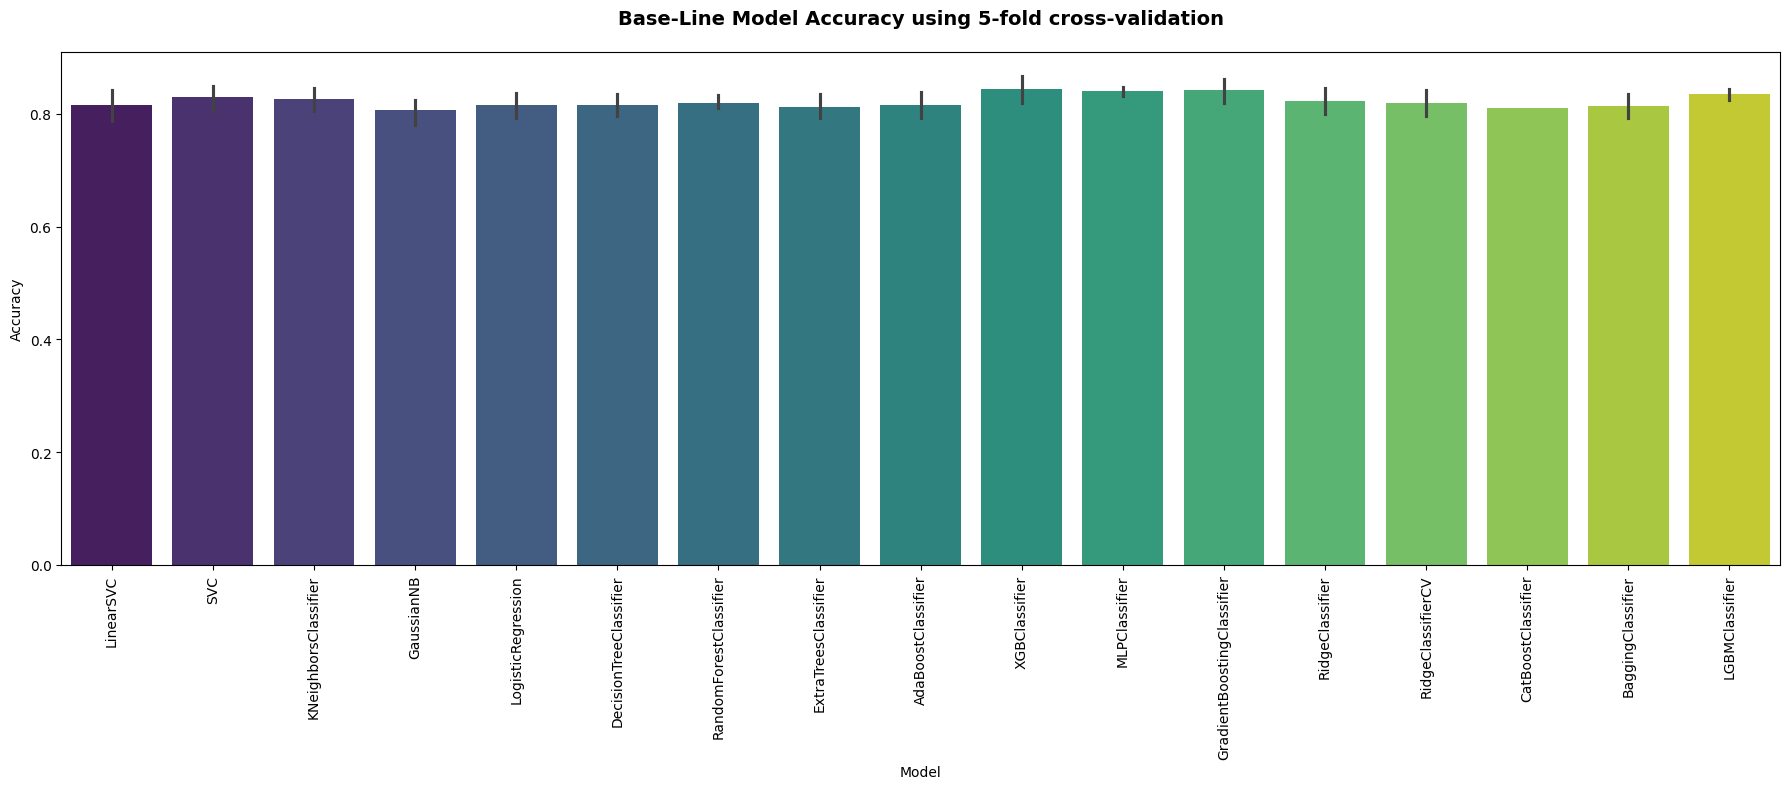

,Mean,Standard Deviation
model_name,,
XGBClassifier,0.844026,0.031373
GradientBoostingClassifier,0.841734,0.027145
MLPClassifier,0.840598,0.009391
LGBMClassifier,0.834857,0.012533
SVC,0.829143,0.027135
KNeighborsClassifier,0.825701,0.026954
RidgeClassifier,0.822253,0.029444
RandomForestClassifier,0.819941,0.015630
RidgeClassifierCV,0.818811,0.029603


In [63]:
generate_baseline_results(plot_result = True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Hyperparameter tuning
    </h1>
</div>

In [64]:
def shap_plot(model, X_test, list_feature, type = None):    
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance")
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [65]:
def plot_ROC_confusionMatrix(estimator, X_val, y_val, figsize):
    y_pred_prob = estimator.predict_proba(X_val)[:, 1]  # Probability of positive class
    y_pred = estimator.predict(X_val)

    fig, ax = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=figsize)
    
    # Plot 1    
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    rocScore = roc_auc_score(y_val, y_pred_prob)

    ax[0, 0].plot(fpr, tpr, label=f"{estimator.__class__.__name__} (AUC = {rocScore:.2f})")
    ax[0, 0].plot([0, 1], [0, 1], "b--")
    ax[0, 0].set_xlabel("False Positive Rate")
    ax[0, 0].set_ylabel("True Positive Rate")
    ax[0, 0].set_title(f"ROC ({estimator.__class__.__name__})", weight="bold")
    ax[0, 0].legend()

    # Plot 2
    confusionMatrix = confusion_matrix(y_val, y_pred)
    sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Blues", ax=ax[0, 1])
    ax[0, 1].set_title(f"Confusion Matrix ({estimator.__class__.__name__})", weight="bold")
    ax[0, 1].set_xlabel("Prediction")
    ax[0, 1].set_ylabel("Actual")

    # plot 3
    precision, recall, thresholds_pr = precision_recall_curve(y_val, y_pred_prob)
    pr_auc = auc(recall, precision)
    ax[1, 0].plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})")
    ax[1, 0].set_xlabel("Recall")
    ax[1, 0].set_ylabel("Precision")
    ax[1, 0].set_title("Precision-Recall Curve")
    ax[1, 0].legend()
    
    ax.flat[-1].set_visible(False)

    plt.tight_layout()
    plt.show()

    print(classification_report(y_val, y_pred))

In [66]:
# Function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, figsize = (15, 6), show_shap_plot = False):
    print(f"Evaluating {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    plot_ROC_confusionMatrix(estimator = model, X_val = X_val, y_val = y_val, figsize = figsize)
    if show_shap_plot:
        shap_sample = X_val.iloc[:200] if isinstance(X_val, pd.DataFrame) else X_val[:200]
        shap_plot(model=model, X_test=shap_sample, list_feature=list_feature_prepared)

In [67]:
X_val = start_test_set.drop("Survived", axis=1)
y_val = start_test_set["Survived"].copy()
X_val_prepared = preprocessor.transform(X_val)

## XGBClassifier

In [68]:
# After running optuna
param_xgb = {
 "n_estimators": 464,
 "max_depth": 10,
 "learning_rate": 0.23447987666516776,
 "subsample": 0.7127691874561295,
 "colsample_bytree": 0.8329901431510234,
 "gamma": 0.5256134656667186,
 "reg_alpha": 0.2906314283624909,
 "reg_lambda": 4.38503731193784,
 "use_label_encoder": False,
 "random_state": seed,
 "verbosity": 0,
 "eval_metric": "logloss",
 "objective": "binary:logistic"
}

best_model_xgb = XGBClassifier(**param_xgb)
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8329901431510234, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=0.5256134656667186, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.23447987666516776,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=464, n_jobs=None,
              num_parallel_tree=None, ...)

Evaluating XGBClassifier...


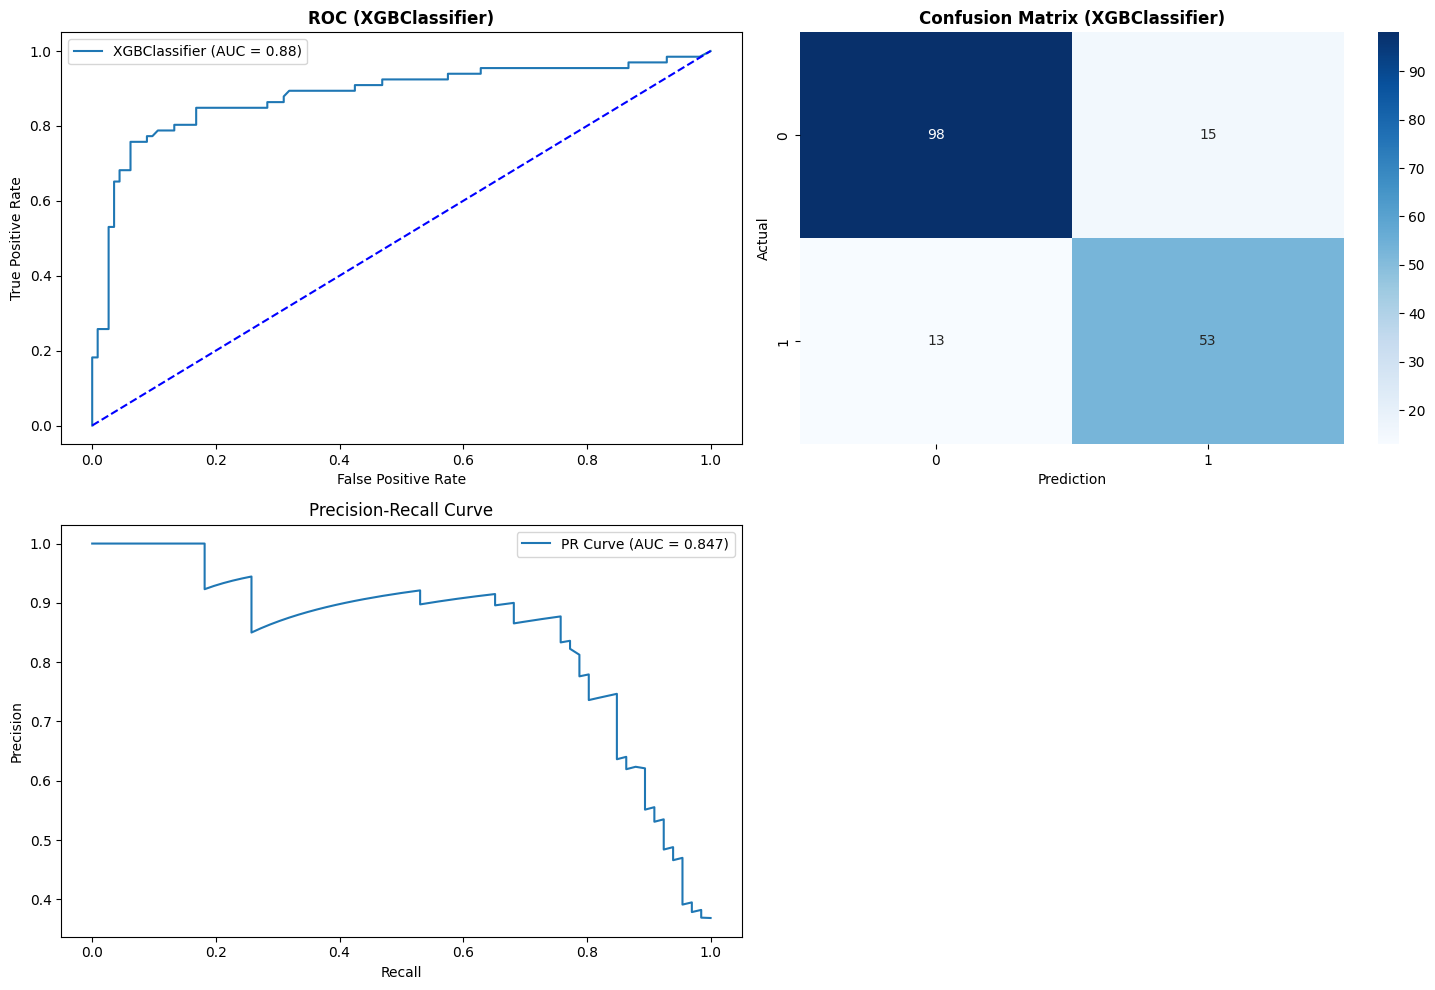

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       113
           1       0.78      0.80      0.79        66

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.84      0.84       179



In [69]:
evaluate_model(model = best_model_xgb, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))

## GradientBoostingClassifier

In [70]:
# After running optuna
param_gb = {
 "n_estimators": 162,
 "max_depth": 4,
 "learning_rate": 0.0771726441470882,
 "subsample": 0.773269722982823,
 "min_samples_split": 5,
 "min_samples_leaf": 3,
 "max_features": None,
 "random_state": seed
}

best_model_gb = GradientBoostingClassifier(**param_gb)
best_model_gb

GradientBoostingClassifier(learning_rate=0.0771726441470882, max_depth=4,
                           min_samples_leaf=3, min_samples_split=5,
                           n_estimators=162, random_state=42,
                           subsample=0.773269722982823)

Evaluating GradientBoostingClassifier...


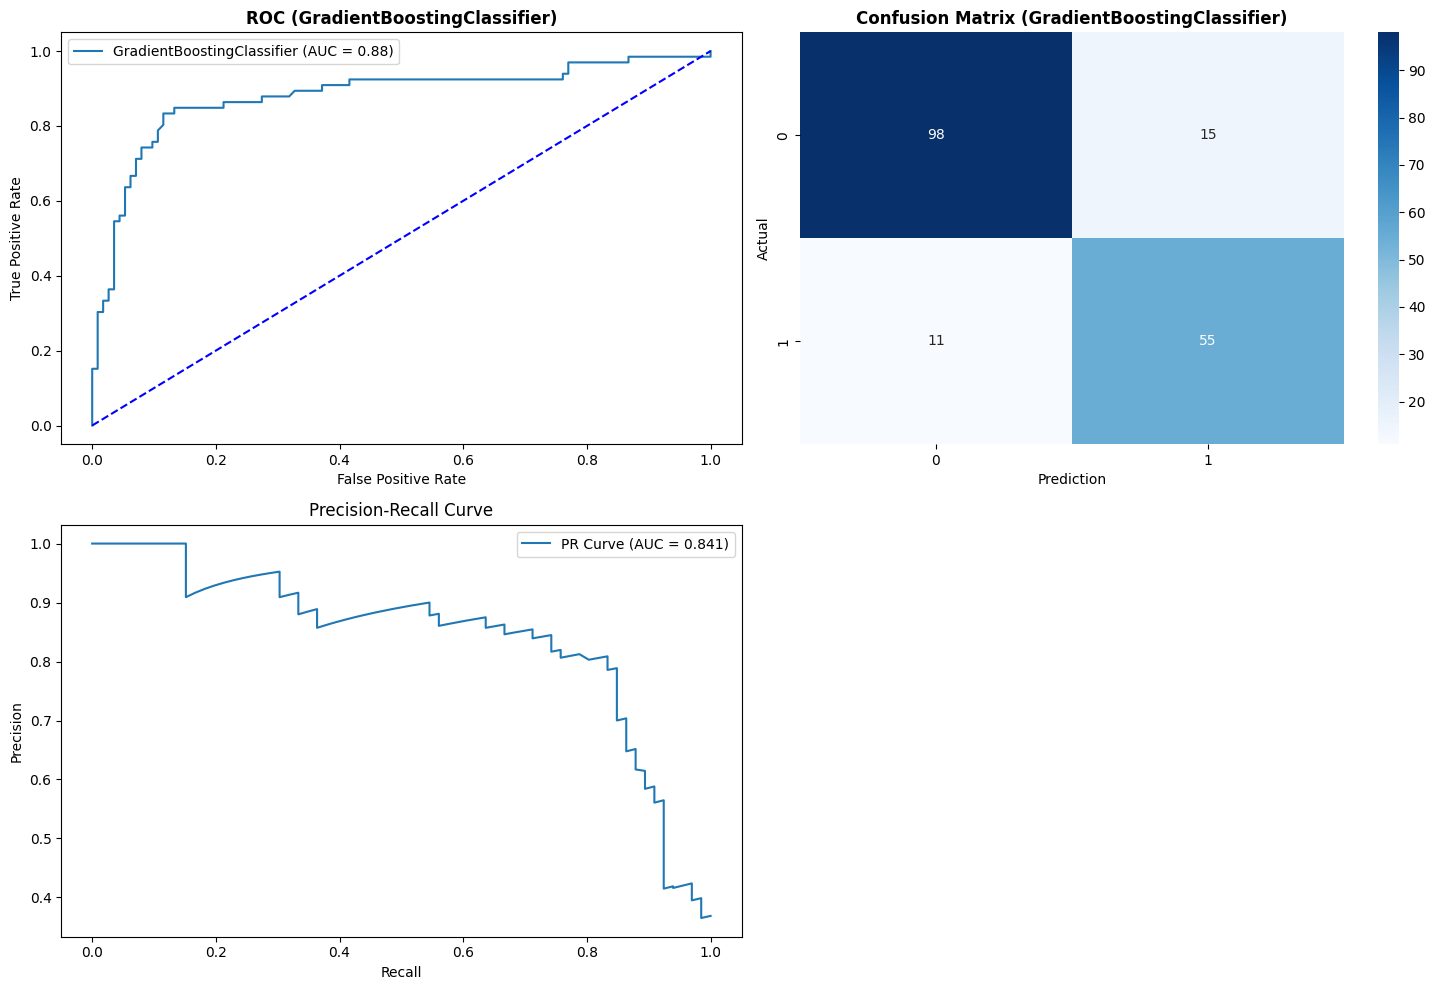

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       113
           1       0.79      0.83      0.81        66

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.85       179
weighted avg       0.86      0.85      0.86       179



In [71]:
evaluate_model(model = best_model_gb, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))

## MLPClassifier

In [72]:
# After running optuna
param_mlpc = {
 "n_layers": 3,
 "n_units_l0": 97,
 "n_units_l1": 101,
 "n_units_l2": 102,
 "activation": "relu",
 "solver": "adam",
 "alpha": 0.0053947648187539915,
 "learning_rate": "invscaling"
}

params = param_mlpc.copy()
n_layers = params.pop("n_layers")
hidden_layer_sizes = tuple([params.pop(f"n_units_l{i}") for i in range(n_layers)])

best_model_mlpc = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes,
    **params,
    max_iter=max_iter,
    random_state=seed,
    early_stopping=True
)
best_model_mlpc

MLPClassifier(alpha=0.0053947648187539915, early_stopping=True,
              hidden_layer_sizes=(97, 101, 102), learning_rate='invscaling',
              max_iter=50000, random_state=42)

Evaluating MLPClassifier...


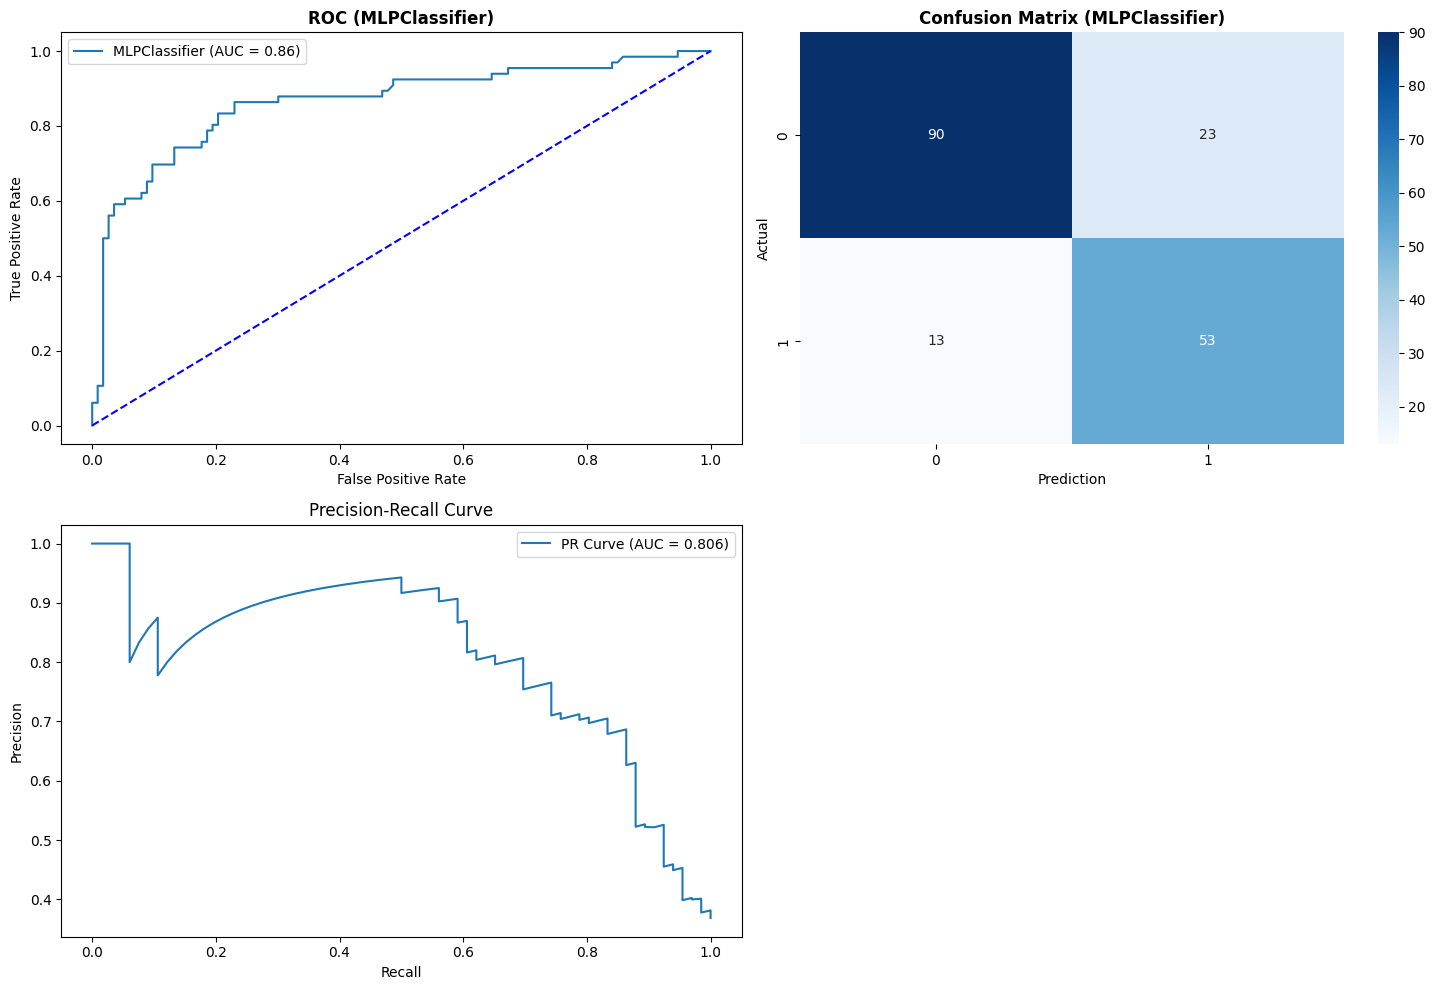

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       113
           1       0.70      0.80      0.75        66

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179



In [73]:
evaluate_model(model = best_model_mlpc, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))

## CatBoostClassifier

In [74]:
# After running optuna
param_cb = {
"iterations": 657,
"depth": 4,
"learning_rate": 0.07768551507730058,
"l2_leaf_reg": 9.252099615629014,
"bootstrap_type": "Bernoulli",
"random_strength": 0.019034287430119336,
"subsample": 0.8078461854958682,
"eval_metric": "Accuracy",
"loss_function": "Logloss",
"verbose": 0,
"random_seed": seed,
"allow_writing_files": False
}

best_model_cb = CatBoostClassifier(**param_cb)
best_model_cb

Evaluating CatBoostClassifier...


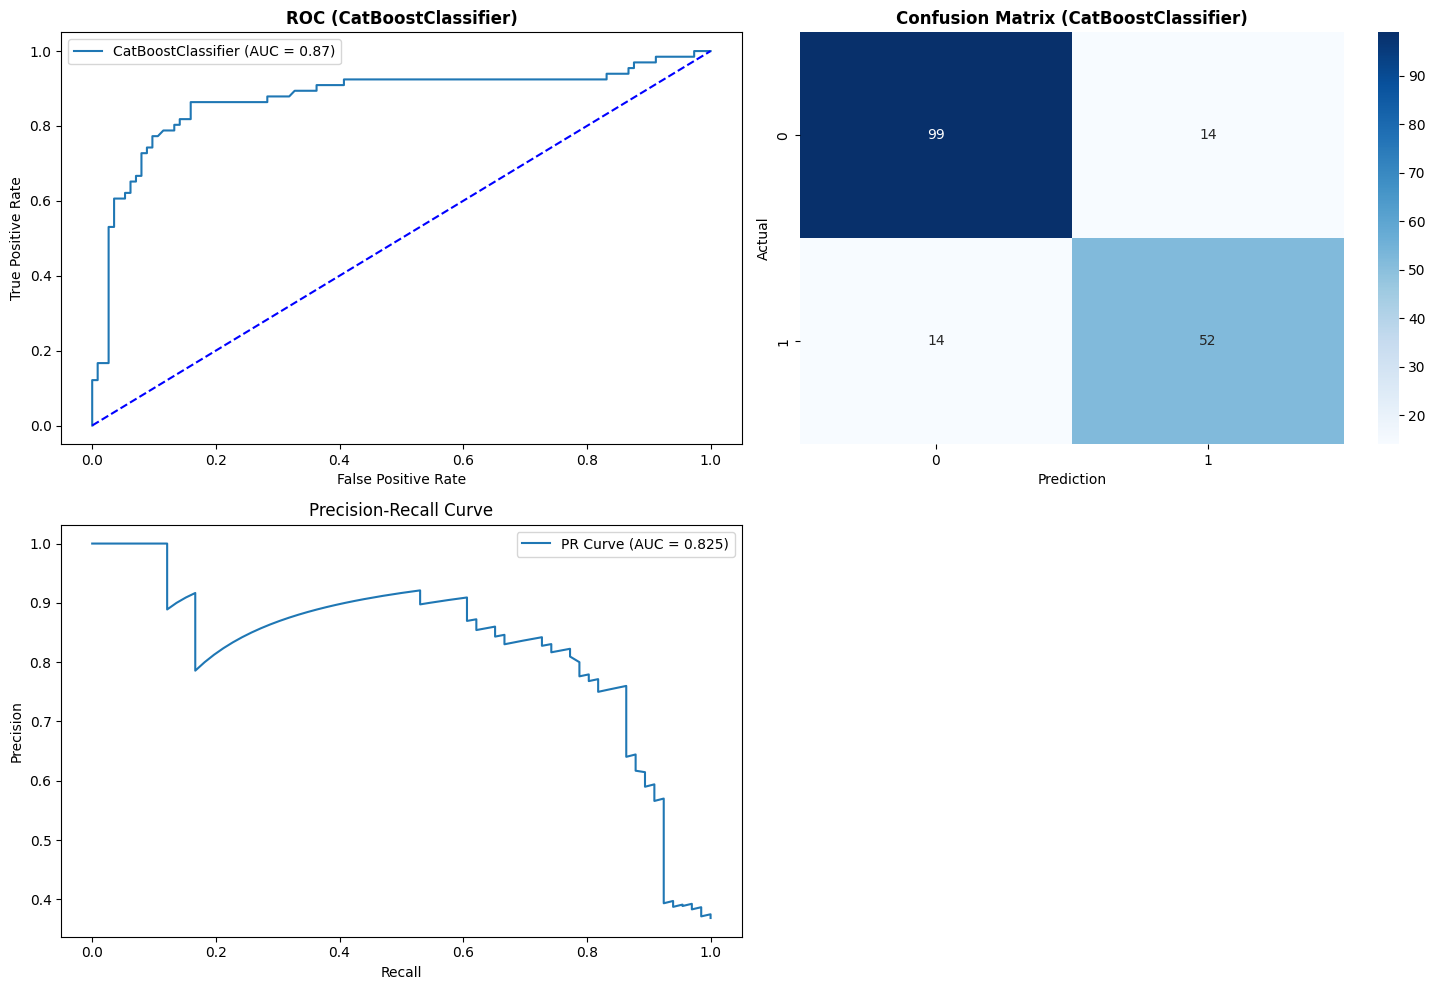

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       113
           1       0.79      0.79      0.79        66

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [75]:
evaluate_model(model = best_model_cb, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Prepare Final Submission File</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Prepare Final Submission File
    </h1>
</div>

## VotingClassifier

In [76]:
df_test_prepared = preprocessor.transform(processed_test_df)

In [77]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ("xgb", best_model_xgb),
        ("gb", best_model_gb),
        ("mlp", best_model_mlpc),
        ("cb", best_model_cb)
    ],
    voting="soft"
)

In [78]:
cv_scores = cross_val_score(
    voting_clf,
    X=X_resampled,
    y=y_resampled,
    cv=kfold,
    scoring="accuracy",
    n_jobs=-1
)

In [79]:
print(f"Cross-validated Accuracy (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validated Accuracy (mean ± std): 0.8555 ± 0.0222


Evaluating VotingClassifier...


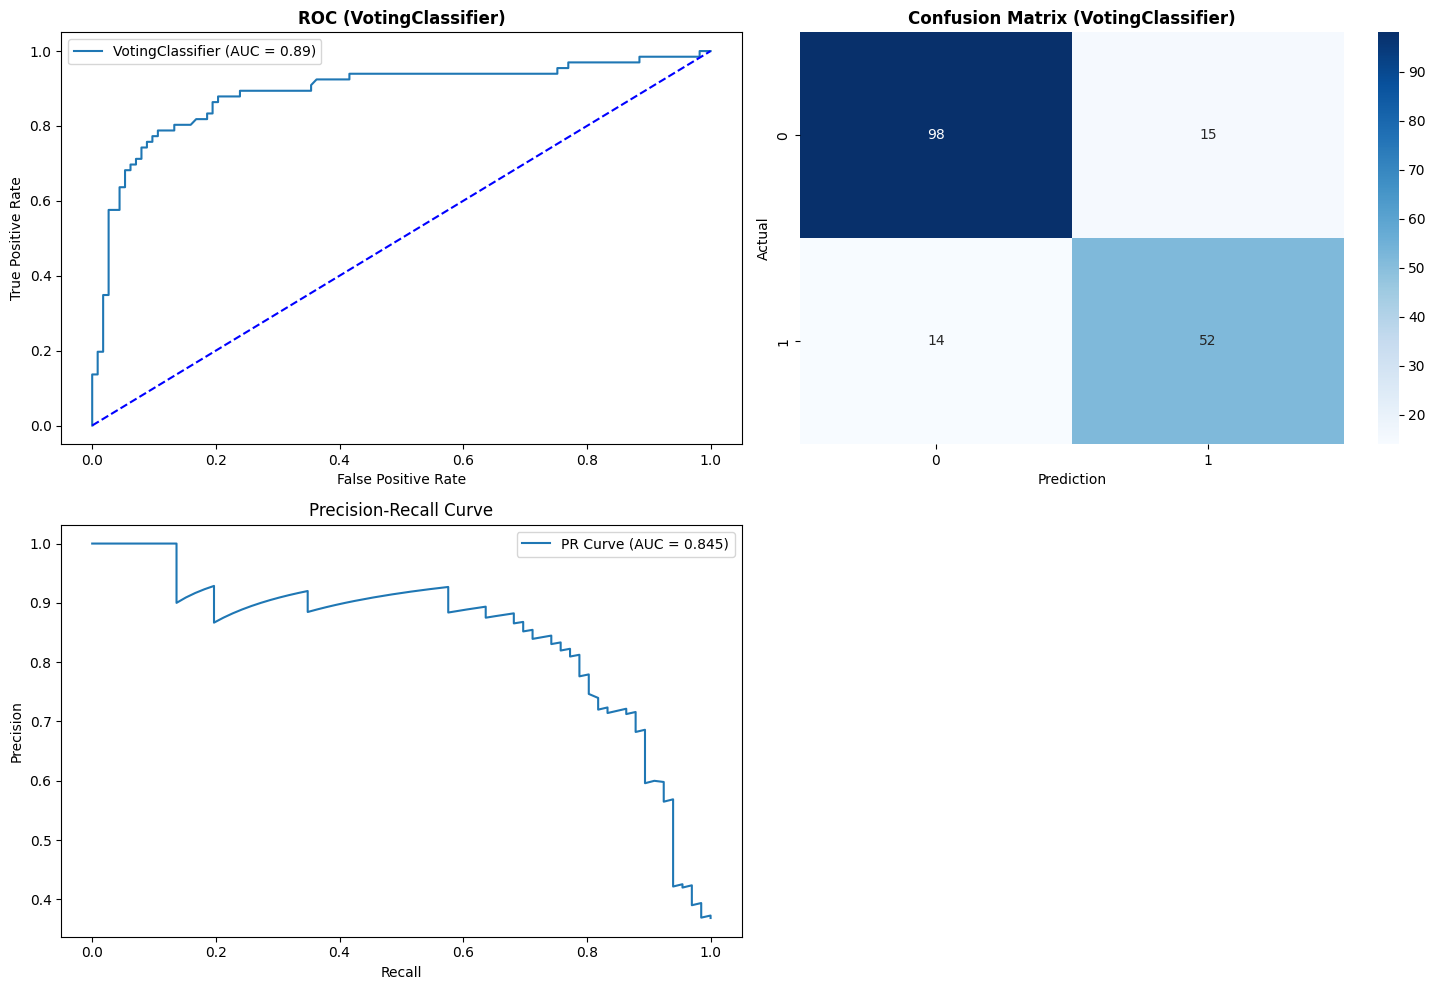

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       113
           1       0.78      0.79      0.78        66

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [80]:
evaluate_model(model = voting_clf, X_train=X_resampled, X_val=X_val_prepared,
               y_train=y_resampled, y_val=y_val, figsize=(15, 10))

In [81]:
from sklearn.metrics import accuracy_score
best_acc = 0
best_thresh = 0.5
for t in np.arange(0.1, 0.9, 0.01):
    preds = (voting_clf.predict_proba(X_val_prepared)[:,1] >= t).astype(int)
    acc = accuracy_score(y_val, preds)
    if acc > best_acc:
        best_acc = acc
        best_thresh = t

print(f"Best threshold = {best_thresh:.2f}, accuracy = {best_acc:.4f}")

Best threshold = 0.56, accuracy = 0.8547


In [82]:
proba_test = voting_clf.predict_proba(df_test_prepared)[:, 1]
y_pred_final = (proba_test >= best_thresh).astype(int)

output = pd.DataFrame({
    "PassengerId": list_test_id,
    "Survived": y_pred_final
})
output.to_csv("submission.csv", index=False)
print("Your submission was successfully saved!")
output.head()

Your submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


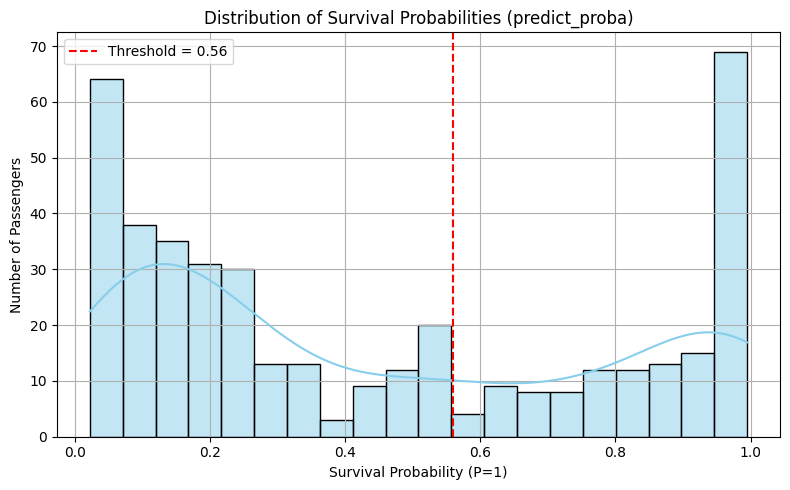

In [83]:
plt.figure(figsize=(8, 5))
sns.histplot(proba_test, bins=20, kde=True, color="skyblue")
plt.axvline(x=best_thresh, color="red", linestyle="--", label=f"Threshold = {best_thresh:.2f}")
plt.title("Distribution of Survival Probabilities (predict_proba)")
plt.xlabel("Survival Probability (P=1)")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Test Set Prediction Distribution:
Survived
0    268
1    150
Name: count, dtype: int64


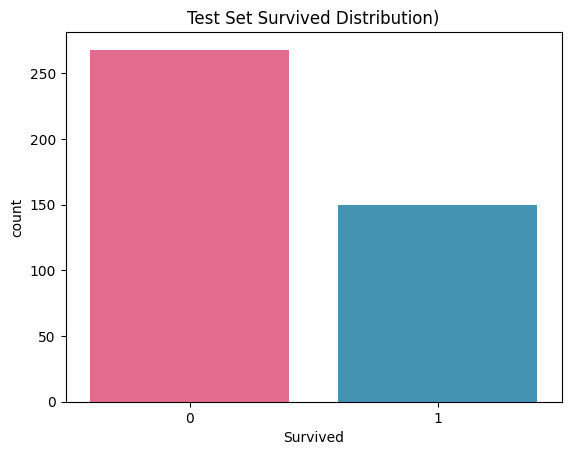

In [84]:
print("\nTest Set Prediction Distribution:")
print(output["Survived"].value_counts())
sns.countplot(data=output, x="Survived", palette=color(n_colors=2))
plt.title(f"Test Set Survived Distribution)")
plt.show()

PermutationExplainer explainer: 201it [00:46,  3.34it/s]                         


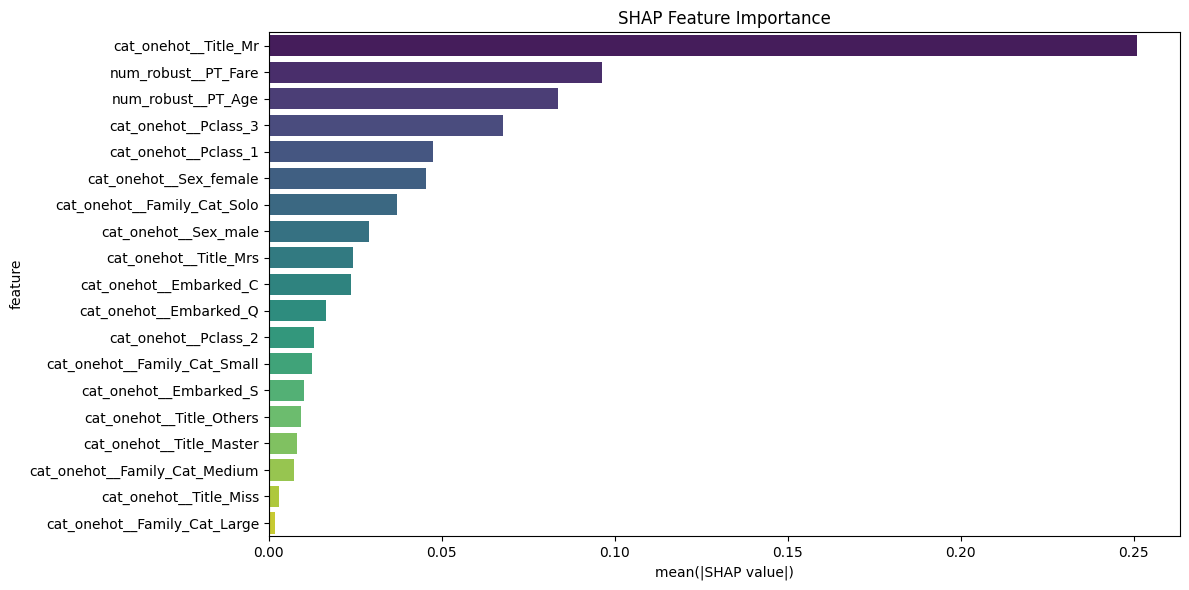

In [87]:
shap_plot(model=voting_clf, X_test=df_test_prepared[:200], list_feature=list_feature_prepared, type="bar")

PermutationExplainer explainer: 201it [00:47,  3.31it/s]                         


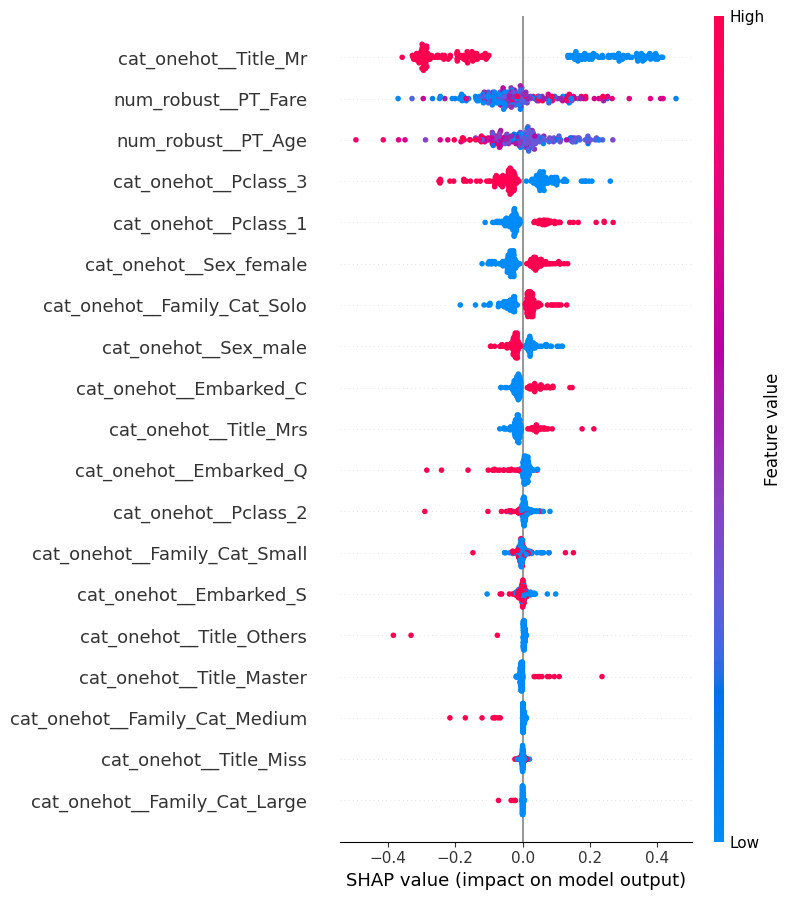

In [88]:
shap_plot(model=voting_clf, X_test=df_test_prepared[:200], list_feature=list_feature_prepared)

**Analysis and Interpretation of the SHAP Summary Plot**

**1. Meaning of the Chart:**

* This is a SHAP summary plot that shows the **importance and directional impact of each feature** on the model’s prediction of survival probability (in this case, using a Voting Classifier).
* Each dot represents a data instance. The color indicates the feature value (red = high, blue = low), and the X-axis represents the SHAP value (the impact on the model output).

**2. Most Important Features:**

* **cat\_onehot\_\_Title\_Mr**: The most important feature. A high value (indicating a male with the title "Mr") **strongly decreases** the survival probability (negative SHAP value).
* **num\_robust\_\_PT\_Fare**: Higher transformed fare values **increase** the survival probability (positive SHAP values).
* **num\_robust\_\_PT\_Age**: Age (after transformation) also has an effect, though not as strong as Fare.
* **cat\_onehot\_\_Sex\_female**: Being female increases survival probability (positive SHAP values).
* **cat\_onehot\_\_Pclass\_3**: Being in third class reduces survival probability (negative SHAP values).
* **cat\_onehot\_\_Pclass\_1**: Being in first class increases survival probability (positive SHAP values).

**3. Other Notable Features:**

* **cat\_onehot\_\_Family\_Cat\_Solo**: Traveling alone decreases the chance of survival.
* **cat\_onehot\_\_Title\_Mrs, \_Miss, \_Master**: These titles (women and children) all contribute positively to survival probability.
* **cat\_onehot\_\_Embarked\_C**: Boarding at Cherbourg (port C) tends to increase the survival probability.
* **cat\_onehot\_\_Family\_Cat\_Small**: Having a small family gives a survival advantage over traveling alone or with a large family.

**4. General Observations:**

* **Gender, title, ticket class, and fare price** are the strongest factors influencing survival.
* **Being male, traveling in third class, and traveling alone** are associated with lower survival chances.
* **Being female, a child, traveling in first class, paying a higher fare, or having a small family** are linked to higher survival chances.
* Features like port of embarkation and family grouping also play a role, though less significant than the others.

**5. Conclusion:**

* The model has effectively learned the historical survival patterns: prioritizing women, children, wealthier individuals (first class), and small family groups.
* The selected and engineered features have been well-prepared, aiding both prediction performance and interpretability.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #a63603; /* Darker warm brown to match palette */
    padding: 20px; 
    background: linear-gradient(135deg, #d73027, #fdae61, #a6d96a, #1a9850); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #ffffff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
